In [134]:
! ls /epyc/projects/kbmod/runs/DEEP/xmatch_catalogs

A0merged.fits
A1merged.fits
B0merged.fits
B1merged.fits
crossmatch_results_fakes.ipynb
expanded_results_catalog.fits
fitres_per_night_per_stare.json
mergedB1a20190926.ecsv
pg_recovery_rates.angular_24mag_50percent_cut.ecsv
pg_recovery_rates.angular_50percent_cut.ecsv
uuid-pg-lookup.ecsv
visit_collection.lookup
xmatch_catalog.angular_24mag_50percent_cut.ecsv
xmatch_catalog.angular_50percent_cut.ecsv
xmatch_catalog_50percent_cut.ecsv


In [108]:
expanded_results_catalog = astropy.table.Table.read(
    "/epyc/projects/kbmod/runs/DEEP/xmatch_catalogs/expanded_results_catalog.fits"
)

In [114]:
kbmod_matched_fakes_catalog = expanded_results_catalog[expanded_results_catalog['ORBITID'] != -1]

In [130]:
kbmod_fakes = []
for g in kbmod_matched_fakes_catalog.group_by("ORBITID").groups:
    g.sort("visit")
    row = g[0]
    night, target, detector = row['pg'].split(".")[0].split("_")
    night = int(night)
    if night != 20190403 and target != "A0c":
        continue
    detector = int(detector)
    kbmod_fakes.append(
        dict(
            ORBITID=row['ORBITID'],
            expnum=row['visit'],
            detector=detector,
            ra=row['ra'],
            dec=row['dec'],
            fake_matched=g['fake_matched'].sum() / len(g)
        )
    )
    
kbmod_fakes = astropy.table.Table(kbmod_fakes)

In [133]:
kbmod_fakes

ORBITID,expnum,detector,ra,dec,fake_matched
int64,int64,int64,float64,float64,float64
14369,845872,23,216.8460621988021,-11.735994585624836,1.0
19008,845872,51,215.77360150577263,-12.55994712966531,1.0
45334,845872,18,217.15439147612847,-11.53918523188397,1.0
46236,995750,53,215.86747370542346,-12.414920193253105,1.0
72536,845872,16,216.69998729296867,-11.57489956911364,1.0
117688,995750,28,215.97520850215108,-11.652528409666177,1.0
124286,855270,32,215.393108136162,-12.091642144326203,1.0
125150,845872,8,215.91306539520892,-11.359136103566417,1.0
126308,855270,10,216.55937811316963,-11.381850702246552,1.0


In [37]:
import matplotlib.pyplot as plt
import numpy as np
import json
import astropy.table
import astropy.units as u
from scipy.stats import ecdf, binned_statistic

In [4]:
with open("/epyc/projects/kbmod/runs/DEEP/xmatch_catalogs/fitres_per_night_per_stare.json") as f:
    kbmod_results = json.load(f)

kbmod_results = kbmod_results['20190403_A0c']

In [5]:
# KBMOD

In [135]:
kbmod_xmatch = astropy.table.Table.read(
    "/epyc/projects/kbmod/runs/DEEP/xmatch_catalogs/xmatch_catalog.angular_50percent_cut.ecsv"
)

kbmod_xmatch = kbmod_xmatch[list(map(lambda x : "20190403_A0c" in x, kbmod_xmatch['pg']))]

kbmod_fake_recoveries = []
for g in kbmod_xmatch.group_by(['pg']).groups:
    pg = g[0]['pg']
    detector = int(pg.split("_")[-1])
    for row in astropy.table.Table.read(f"/epyc/projects/kbmod/runs/DEEP/results/{pg}.results.ecsv"):
        kbmod_fake_recoveries.append(
            dict(
                x=row['x'],
                y=row['y'],
                detector=detector,
                uuid=row['uuid'],
            )
        )
#     break

kbmod_fake_recoveries = astropy.table.Table(kbmod_fake_recoveries)
kbmod_fake_recoveries = astropy.table.join(kbmod_fake_recoveries, kbmod_xmatch, keys=['uuid'])

In [136]:
kbmod_fake_recoveries

x,y,detector,uuid,ORBITID,pg,avg_mag,avg_h_mag,nimgs,ncount,npoints,percent_xmatch,vx,vy,L,flux,obs_count
int64,int64,int64,str36,int64,str16,float64,float64,int64,int64,int64,float64,float64,float64,float64,float64,int64
1991,1379,47,01b50bbe-1267-449e-8820-c44a76f83a99,4406965,20190403_A0c_047,22.002610544579547,3.654408431279267,104,104,104,1.0,161.41212463378906,41.51993942260742,112.88771593261849,604.8756591233594,77
3639,1322,22,021e0710-51f2-45c9-8090-15bc64e2a9b0,1553623,20190403_A0c_022,26.79365355668495,8.992966801695498,104,208,208,1.0,196.48419189453125,83.09678649902344,7.764300451207054,34.97875653387977,99
1474,87,44,03d4a9c5-d1f1-4197-8daa-a1f9bd572a8b,3526780,20190403_A0c_044,25.074177058971582,6.940537092115861,104,104,104,1.0,158.22438049316406,85.81983184814453,7.843788192731188,37.21219365443882,90
1554,1396,9,050ec497-9716-4edc-8402-18bf646d1110,5331816,20190403_A0c_009,24.4343800841964,10.023326026392285,104,104,104,1.0,309.74078369140625,170.0149688720703,17.57967500930495,82.24695837558714,98
3266,1377,48,080e0f3a-48a8-424e-97ed-7ec9709557c8,4627880,20190403_A0c_048,24.747202032425108,7.23994490502659,104,104,104,1.0,181.91685485839844,111.43325805664062,11.12495908924603,52.13206982198796,101
2021,1511,4,083888b2-b792-4922-ba08-763204ad1773,188646,20190403_A0c_004,24.122782771563614,7.981063858127711,104,104,104,1.0,226.909912109375,96.72815704345703,18.983481655557256,91.86608865571928,97
1889,1223,19,0a408cf7-bd5c-4d20-83c1-3d75fc3cf7fe,2268515,20190403_A0c_019,23.960330040551405,6.8665022464651315,104,104,104,1.0,206.33694458007812,76.3221206665039,21.955167598937187,99.35831222567265,100
2709,745,29,0ae490e5-63fb-416e-8041-5a53ae876b45,1651667,20190403_A0c_029,22.002888950361573,5.119689611456664,104,104,104,1.0,206.69725036621094,75.34086608886719,137.62136573213266,650.1173795362291,93
2140,1738,50,0b34b98b-e2e4-4d19-9ada-3d606d47e528,3419952,20190403_A0c_050,25.350325932413618,8.900726776179486,104,104,104,1.0,226.2124786376953,57.204559326171875,7.80251534056,35.290065028379196,101


In [137]:
astropy.table.join(
    kbmod_fake_recoveries,
    fakes_info_with_pos,
    keys=['ORBITID', 'detector']
)

x_1,y_1,detector,uuid,ORBITID,pg,avg_mag,avg_h_mag,nimgs,ncount,npoints,percent_xmatch,vx,vy,L,flux,obs_count,vra,vdec,v,phi,dt,N,mag,type,binary,ra,dec,expnum,x_2,y_2
,,,,,,,,,,,,,,,,,deg / d,deg / d,deg / d,deg,d,,,,,,,,,
int64,int64,int64,str36,int64,str16,float64,float64,int64,int64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64,str8,bool,float64,float64,int32,float64,float64
3180,899,23,76e17ded-71bd-4c68-b838-45a7b7c517f5,14369,20190403_A0c_023,23.75481775599339,7.582019123607069,104,104,104,1.0,234.26820373535156,112.77593994140625,27.31171687901037,125.99025581915741,102,-0.01684405047536603,0.007583666323251909,0.01815205713368831,155.7613830895857,0.1783794189686887,104,23.75481775599339,tno,False,-143.1540032246832,-11.735935674154563,845872,1173.7845248779997,913.6227271617197
2610,847,51,69970026-2785-4833-b29d-99283dd016da,19008,20190403_A0c_051,21.827210079744734,3.849101297645985,104,104,104,1.0,171.7617950439453,53.83203125,153.04994611812245,724.5589967573776,92,-0.012783528515127991,0.004356245159686846,0.013216200174045858,161.18242122949152,0.1783794189686887,104,21.827210079744734,tno,False,-144.22639346088633,-12.559988179008414,845872,1238.5664618097676,1491.1326639219797
3296,1349,18,cce44e67-7ed8-4c78-bfae-42bc9baa3fc8,45334,20190403_A0c_018,24.843695014460213,9.252705146187267,104,104,104,1.0,276.4862060546875,132.66433715820312,11.680189854775847,54.41805158397674,99,-0.019309988073583622,0.008479927155321886,0.020733216394910388,156.29145499978975,0.1783794189686887,104,24.843695014460213,tno,False,-142.84575646674799,-11.539093903031912,845872,721.5558944747229,799.727933088923
2119,425,60,e38b86b1-5cb2-4f4c-aea4-6d1a71254ca4,46206,20190403_A0c_060,21.097760345908952,1.7124051004217833,104,104,104,1.0,143.6689453125,29.501611709594727,248.23790353425056,1234.5136821963267,94,-0.009884910308630155,0.0023171361260139137,0.009909377202638896,166.8074097987989,0.1783794189686887,104,21.097760345908952,tno,False,-143.87239724837528,-12.920153989002872,845872,1651.779244437033,1986.6894792341009
887,845,16,1dc34a1b-5c17-4ac3-b575-48f2fff001d7,72536,20190403_A0c_016,24.734805524754293,6.3126812599775395,104,104,104,1.0,150.28134155273438,54.91374206542969,11.218376845579478,52.68724513436441,99,-0.011450947439715656,0.0040681787923744885,0.01193295886425869,160.4413972833395,0.1783794189686887,104,24.734805524754293,tno,False,-143.2999894292651,-11.574949111646212,845872,1225.134178368486,3210.256856789627
820,1522,8,3741b2c9-b5d2-4e76-a4e7-c589a70e14a7,125150,20190403_A0c_008,21.432044943184277,5.856888156275617,104,104,104,1.0,283.925537109375,73.6934814453125,262.4701713943316,1234.6368150317708,93,-0.021494091435165154,0.005418141589351644,0.021758488377920743,165.85186964637722,0.1783794189686887,104,21.432044943184277,tno,False,-144.08689563725352,-11.359113137296548,845872,548.0420360637032,3279.6322161717585
3166,1245,7,ba7bca79-82ca-477b-96ed-b16ab6c8e773,155315,20190403_A0c_007,24.39527500587231,6.083657683776522,104,104,104,1.0,164.97500610351562,100.80191040039062,13.261532657796373,64.35690359207615,96,-0.011962589957212728,0.005511249864869879,0.01296387735498421,155.26414148763266,0.1783794189686887,104,24.39527500587231,tno,False,-143.15260940885096,-11.217764492477633,845872,827.6601338144139,935.4395483393596
2106,1650,37,cdfd184c-12fa-49ea-a26f-be0375bb1d1f,184101,20190403_A0c_037,25.81900201347942,7.260494466280615,104,208,208,1.0,187.39999389648438,47.529136657714844,8.465293101708557,39.36071759170793,99,-0.011380619329067513,0.0022743101733705847,0.011361458541623246,168.69884764385642,0.1783794189686887,208,25.81900201347942,tno,True,-142.9157576740668,-12.010543799631996,845872,422.58987554771113,1985.7557369537124


In [8]:
# SALAD
! ls /epyc/projects/salad/search/tno_search/DEEP/20190403/

A0c


In [331]:
from salad.serialize import read
from pathlib import Path

def found_in(match_results):
    found_results = []
    for k in match_results:
        r = match_results[k]
        candidates = []
        for l in r:
            d = r[l]
            ratio = d['fake'] / d['total']
            candidates.append((l, ratio, d['fake'], d['total']))
        
        # pick highest ratio match
        candidates = sorted(candidates, key=lambda x : x[1], reverse=True) 
        if len(candidates) > 0:
            found_in = candidates[0][0]
            ratio = candidates[0][1]
            f = candidates[0][2]
            t = candidates[0][3]
        else:
            found_in = -1
            ratio = -1.
            f = -1.
            t = -1.
        found_results.append(
            {
                "ORBITID": k, 
                "found_in": found_in, 
                "ratio": ratio, 
                "fake": f,
                "total": t,
            }
        )
    return astropy.table.Table(found_results)

def found_results(label):
    prefixes = Path("/epyc/projects/salad/search/tno_search/DEEP/20190403/A0c").rglob("snr_[0-5].0/regular/" + label)
    results = []
    for p in prefixes:
        snr = float(p.parent.parent.name.split("_")[1])
        detector = int(p.parent.parent.parent.name.split("_")[1])
        r_p = p / "gathered_match_line.pkl"
        try:
#             c_p = read(p / "clusters.pkl")
            r = found_in(read(r_p))
            r['found'] = (r['found_in'] >= 0)
            r['detector'] = detector
            r['snr'] = snr
            results.append(r)
        except Exception as e:
            print(e)
            print(r_p)

#             r = astropy.table.join(fakes_info(fakes), found(read()), keys=['ORBITID'])
#             r['detector'] = detector
#             r['snr'] = snr
#             results.append(r)
#         break
    return astropy.table.vstack(results)

found_tno = found_results("tno_all")

In [332]:
found_tno

ORBITID,found_in,ratio,fake,total,found,detector,snr
int64,int64,float64,int64,int64,bool,int64,float64
2405372,13,1.0,104,104,True,1,0.0
4279478,29,0.6634615384615384,69,104,True,1,0.0
5962014,16,1.0,104,104,True,1,0.0
10041343,31,0.009615384615384616,1,104,True,1,0.0
13039521,955,0.009615384615384616,1,104,True,1,0.0
14621325,167,0.009615384615384616,1,104,True,1,0.0
14813564,462,0.009615384615384616,1,104,True,1,0.0
2405372,8,1.0,104,104,True,1,1.0
4279478,22,1.0,104,104,True,1,1.0


In [13]:
from salad.fakes.recover import fakes_info

prefixes = Path("/epyc/projects/salad/search/tno_search/DEEP").rglob("detector_*")
fakes_lookup = {}
fakes_info_lookup = {}
for prefix in prefixes:
    detector = int(prefix.name.split("_")[1])
    fakes_p = prefix / "fakes.pkl"    
    try:
        fakes = read(fakes_p)
        fakes_lookup[detector] = fakes
        info = fakes_info(fakes_lookup[detector])
        # add ra/dec info
        ra = []
        dec = []
        expnum = []
        for orbitid in info['ORBITID']:
            f = fakes[fakes['ORBITID'] == orbitid]
            f.sort('EXPNUM')
            ra.append(f[0]['RA'])
            dec.append(f[0]['DEC'])
            expnum.append(f[0]['EXPNUM'])
        info['ra'] = ra
        info['dec'] = dec
        info['expnum'] = expnum
            
        fakes_info_lookup[detector] = info
    except Exception as e:
        print(e)
        print(fakes_p)


Ran out of input
/epyc/projects/salad/search/tno_search/DEEP/20190403/A0c/detector_2/fakes.pkl
Ran out of input
/epyc/projects/salad/search/tno_search/DEEP/20190403/A0c/detector_61/fakes.pkl


In [14]:
read("/epyc/projects/salad/search/tno_search/DEEP/20190403/A0c/detector_7/fakes.pkl")

RA,DEC,EXPNUM,CCDNUM,ORBITID,aei,mjd_mid,TDB,xv,H_VR,AMP,PERIOD,PHASE,d,observatory,r,MAG,type
float64,float64,int32,int64,int64,float64[6],float64,float64,float64[6],float64,float64,float64,float64,float64,float64[3],float64,float64,str8
-143.15260940885096,-11.217764492477633,845872,7,155315,54.52076384818102 .. 175.65643838558174,58577.21447994315,19.254525066949327,-51.228059861903986 .. 0.3030751009354794,6.083657683776522,0.2311276240164892,694.7752341780015,1.0658863095561673,64.93286640711169,-0.9723130239773092 .. -0.09252563558321852,64.02480872149579,24.405870436504575,tno
-143.1526298749825,-11.217755101896138,845873,7,155315,54.52076384818102 .. 175.65643838558174,58577.21619125002,19.25452975225221,-51.22805798585623 .. 0.303075109423911,6.083657683776522,0.2311276240164892,694.7752341780015,1.0658863095561673,64.93286599241358,-0.9723063207295254 .. -0.09253705087391721,64.02479565239811,24.40574835921663,tno
-143.1526511230529,-11.217745352440188,845874,7,155315,54.52076384818102 .. 175.65643838558174,58577.21796780527,19.254534616195542,-51.22805603827865 .. 0.30307511823598743,6.083657683776522,0.2311276240164892,694.7752341780015,1.0658863095561673,64.9328655619039,-0.9722993567140087 .. -0.09254890132897936,64.02478209008497,24.405619071335067,tno
-143.1526715901089,-11.217735961232375,845875,7,155315,54.52076384818102 .. 175.65643838558174,58577.21967893464,19.2545393010123,-51.228054162425195 .. 0.3030751267235368,6.083657683776522,0.2311276240164892,694.7752341780015,1.0658863095561673,64.9328651472487,-0.9722926441883359 .. -0.09256031528333111,64.024769032151,24.405492084359366,tno
-143.15269209608442,-11.217726552034724,845876,7,155315,54.52076384818102 .. 175.65643838558174,58577.22139319794,19.25454399440946,-51.228052283135895 .. 0.30307513522663065,6.083657683776522,0.2311276240164892,694.7752341780015,1.0658863095561673,64.93286473183403,-0.9722859144864211 .. -0.09257175006685092,64.02475595514746,24.405362445248237,tno
-143.1527126238247,-11.217717132697446,845877,7,155315,54.52076384818102 .. 175.65643838558174,58577.2231091633,19.254548692466642,-51.22805040198051 .. 0.30307514373816624,6.083657683776522,0.2311276240164892,694.7752341780015,1.0658863095561673,64.93286431600687,-0.9722791732233937 .. -0.09258319613091369,64.02474287002737,24.40523025341926,tno
-143.15273315241475,-11.217707712796072,845878,7,155315,54.52076384818102 .. 175.65643838558174,58577.22482508671,19.254553390408773,-51.22804852087102 .. 0.30307515224949255,6.083657683776522,0.2311276240164892,694.7752341780015,1.0658863095561673,64.93286390018983,-0.9722724272637077 .. -0.09259464183675381,64.02472979011519,24.405095641116834,tno
-143.15275377291468,-11.217698250523338,845879,7,155315,54.52076384818102 .. 175.65643838558174,58577.226548581515,19.254558109080563,-51.22804663146098 .. 0.3030751607983744,6.083657683776522,0.2311276240164892,694.7752341780015,1.0658863095561673,64.93286348253797,-0.972265646659101 .. -0.09260613797159109,64.02471665741602,24.4049579965329,tno
-143.15277419258808,-11.217688880191195,845880,7,155315,54.52076384818102 .. 175.65643838558174,58577.228255184666,19.25456278150523,-51.22804476056866 .. 0.3030751692634689,6.083657683776522,0.2311276240164892,694.7752341780015,1.0658863095561673,64.93286306897942,-0.9722589277096986 .. -0.09261752136145085,64.02470365830511,24.404819294567826,tno


In [15]:
fakes_info_table = []
for d in fakes_info_lookup:
    g = fakes_info_lookup[d]
    g['detector'] = d
    fakes_info_table.append(g)
fakes_info_table = astropy.table.vstack(fakes_info_table)

In [85]:
fakes_info_table

ORBITID,vra,vdec,v,phi,dt,N,mag,type,binary,ra,dec,expnum,detector
,deg / d,deg / d,deg / d,deg,d,,,,,,,,
int64,float64,float64,float64,float64,float64,int64,float64,str8,bool,float64,float64,int32,int64
2405372,-0.01950935166310317,0.004005313270790564,0.019558461629477754,168.39825700754162,0.1783794189686887,104,24.573885428055313,tno,False,-143.72882910879343,-11.106944662458458,845872,1
2732908,-0.011655296420758805,0.003895221351861602,0.012082481222041624,161.52027795964636,0.1783794189686887,104,25.68617649738313,tno,False,-143.87399522376458,-11.097268022789734,845872,1
3881210,-0.00918594583080613,0.0031365914998971365,0.009545628956146747,161.1472486254834,0.1783794189686887,104,26.306819324841076,tno,False,-143.9788248661037,-11.052010429480955,845872,1
3898678,-0.014284347013795775,0.004537530591439663,0.014735776461058392,162.3771570720673,0.1783794189686887,104,26.47601778348476,tno,False,-144.01237480524694,-11.045180486472034,845872,1
4279478,-0.011176547258878494,0.005099762757632685,0.012096529156942875,155.47319226296221,0.1783794189686887,104,24.78000547555636,tno,False,-143.89474479487583,-11.06011324210809,845872,1
5182786,-0.007471236421779182,0.0035404044855064935,0.00814373039496204,154.64506986598138,0.1783794189686887,104,26.158283666804156,tno,False,-143.9401560213359,-11.003650036521181,845872,1
5485151,-0.0006049468632375215,0.0002192280459709196,0.0006330107597850406,160.07987686781578,0.1783794189686887,104,24.156122049911747,tno,False,-143.72764972951617,-10.997970399785427,845872,1
5962014,-0.013244086661610222,0.004038602096829615,0.013612382654722257,163.04163601016464,0.1783794189686887,104,24.547227600193064,tno,False,-143.72126558145553,-11.02908971806769,845872,1


In [138]:
fake_xy = []
images = read(f"/epyc/projects/salad/images.pkl")
for g in fakes_info_table.group_by(['expnum', 'detector']).groups:
    expnum = g[0]['expnum']
    detector = g[0]['detector']
    # would have been better if images were indexed on expnum...
    
    image = images.get((expnum, detector))

    wcs = image.reader.readWcs()
    for orbit, ra, dec, x, y in zip(
        g['ORBITID'], g['ra'], g['dec'], *wcs.skyToPixelArray(g['ra'] * np.pi/180, g['dec'] * np.pi/180)
    ):
        fake_xy.append(
            dict(
                expnum=expnum,
                detector=detector,
                ORBITID=orbit,
                x=x,
                y=y,
                ra=ra, 
                dec=dec,
            )
        )
#     break

fakes_info_with_pos = astropy.table.join(
    fakes_info_table,
    astropy.table.Table(fake_xy)
)
fakes_info_with_pos = fakes_info_with_pos[~fakes_info_with_pos['binary']]

In [139]:
fakes_info_with_pos

ORBITID,vra,vdec,v,phi,dt,N,mag,type,binary,ra,dec,expnum,detector,x,y
,deg / d,deg / d,deg / d,deg,d,,,,,,,,,,
int64,float64,float64,float64,float64,float64,int64,float64,str8,bool,float64,float64,int32,int64,float64,float64
2099,-0.01044541805477161,0.004682550264551548,0.011264763715425227,155.85390318489954,0.1783794189686887,104,26.601718944006567,tno,False,-143.9352217876162,-11.23051029609669,845872,4,1029.3585208715808,3182.503500889399
14369,-0.01684405047536603,0.007583666323251909,0.01815205713368831,155.7613830895857,0.1783794189686887,104,23.75481775599339,tno,False,-143.1540032246832,-11.735935674154563,845872,23,1173.7845248779997,913.6227271617197
19008,-0.012783528515127991,0.004356245159686846,0.013216200174045858,161.18242122949152,0.1783794189686887,104,21.827210079744734,tno,False,-144.22639346088633,-12.559988179008414,845872,51,1238.5664618097676,1491.1326639219797
45334,-0.019309988073583622,0.008479927155321886,0.020733216394910388,156.29145499978975,0.1783794189686887,104,24.843695014460213,tno,False,-142.84575646674799,-11.539093903031912,845872,18,721.5558944747229,799.727933088923
46206,-0.009884910308630155,0.0023171361260139137,0.009909377202638896,166.8074097987989,0.1783794189686887,104,21.097760345908952,tno,False,-143.87239724837528,-12.920153989002872,845872,60,1651.779244437033,1986.6894792341009
62637,-0.019375657510388288,0.00481162692801898,0.019569702349596166,166.05365265175786,0.1783794189686887,104,22.918396097512055,tno,False,-143.92281834184547,-11.7604208145583,845872,20,1532.2055307716032,3387.059852233368
67139,-0.02343349279120617,0.012733465518704815,0.026147965920002042,151.48089893086004,0.1783794189686887,104,24.55026639650741,tno,False,-143.79199418122468,-12.9453440875653,845872,60,1992.360315327454,3060.7447077621396
72536,-0.011450947439715656,0.0040681787923744885,0.01193295886425869,160.4413972833395,0.1783794189686887,104,24.734805524754293,tno,False,-143.2999894292651,-11.574949111646212,845872,16,1225.134178368486,3210.256856789627


In [312]:
fakes_info_with_pos

ORBITID,vra,vdec,v,phi,dt,N,mag,type,binary,ra,dec,expnum,detector,x,y
,deg / d,deg / d,deg / d,deg,d,,,,,,,,,,
int64,float64,float64,float64,float64,float64,int64,float64,str8,bool,float64,float64,int32,int64,float64,float64
2099,-0.01044541805477161,0.004682550264551548,0.011264763715425227,155.85390318489954,0.1783794189686887,104,26.601718944006567,tno,False,-143.9352217876162,-11.23051029609669,845872,4,1029.3585208715808,3182.503500889399
14369,-0.01684405047536603,0.007583666323251909,0.01815205713368831,155.7613830895857,0.1783794189686887,104,23.75481775599339,tno,False,-143.1540032246832,-11.735935674154563,845872,23,1173.7845248779997,913.6227271617197
19008,-0.012783528515127991,0.004356245159686846,0.013216200174045858,161.18242122949152,0.1783794189686887,104,21.827210079744734,tno,False,-144.22639346088633,-12.559988179008414,845872,51,1238.5664618097676,1491.1326639219797
45334,-0.019309988073583622,0.008479927155321886,0.020733216394910388,156.29145499978975,0.1783794189686887,104,24.843695014460213,tno,False,-142.84575646674799,-11.539093903031912,845872,18,721.5558944747229,799.727933088923
46206,-0.009884910308630155,0.0023171361260139137,0.009909377202638896,166.8074097987989,0.1783794189686887,104,21.097760345908952,tno,False,-143.87239724837528,-12.920153989002872,845872,60,1651.779244437033,1986.6894792341009
62637,-0.019375657510388288,0.00481162692801898,0.019569702349596166,166.05365265175786,0.1783794189686887,104,22.918396097512055,tno,False,-143.92281834184547,-11.7604208145583,845872,20,1532.2055307716032,3387.059852233368
67139,-0.02343349279120617,0.012733465518704815,0.026147965920002042,151.48089893086004,0.1783794189686887,104,24.55026639650741,tno,False,-143.79199418122468,-12.9453440875653,845872,60,1992.360315327454,3060.7447077621396
72536,-0.011450947439715656,0.0040681787923744885,0.01193295886425869,160.4413972833395,0.1783794189686887,104,24.734805524754293,tno,False,-143.2999894292651,-11.574949111646212,845872,16,1225.134178368486,3210.256856789627


In [333]:
salad_fake_recoveries = astropy.table.join(
    fakes_info_with_pos[
        ~fakes_info_with_pos['binary']
        &
        (fakes_info_with_pos['type'] == 'tno')
    ], 
    found_tno, keys=['ORBITID', 'detector']
)

salad_fake_recoveries = salad_fake_recoveries[salad_fake_recoveries['expnum'] == 845872]

In [144]:
(salad_fake_recoveries['expnum'] != 845872).sum() / len(salad_fake_recoveries)

0.0

In [334]:
salad_fake_recoveries

ORBITID,vra,vdec,v,phi,dt,N,mag,type,binary,ra,dec,expnum,detector,x,y,found_in,ratio,fake,total,found,snr
,deg / d,deg / d,deg / d,deg,d,,,,,,,,,,,,,,,,
int64,float64,float64,float64,float64,float64,int64,float64,str8,bool,float64,float64,int32,int64,float64,float64,int64,float64,int64,int64,bool,float64
14369,-0.01684405047536603,0.007583666323251909,0.01815205713368831,155.7613830895857,0.1783794189686887,104,23.75481775599339,tno,False,-143.1540032246832,-11.735935674154563,845872,23,1173.7845248779997,913.6227271617197,1,1.0,104,104,True,0.0
14369,-0.01684405047536603,0.007583666323251909,0.01815205713368831,155.7613830895857,0.1783794189686887,104,23.75481775599339,tno,False,-143.1540032246832,-11.735935674154563,845872,23,1173.7845248779997,913.6227271617197,1,1.0,104,104,True,1.0
14369,-0.01684405047536603,0.007583666323251909,0.01815205713368831,155.7613830895857,0.1783794189686887,104,23.75481775599339,tno,False,-143.1540032246832,-11.735935674154563,845872,23,1173.7845248779997,913.6227271617197,1,1.0,104,104,True,2.0
14369,-0.01684405047536603,0.007583666323251909,0.01815205713368831,155.7613830895857,0.1783794189686887,104,23.75481775599339,tno,False,-143.1540032246832,-11.735935674154563,845872,23,1173.7845248779997,913.6227271617197,58,1.0,104,104,True,4.0
14369,-0.01684405047536603,0.007583666323251909,0.01815205713368831,155.7613830895857,0.1783794189686887,104,23.75481775599339,tno,False,-143.1540032246832,-11.735935674154563,845872,23,1173.7845248779997,913.6227271617197,5,1.0,104,104,True,3.0
14369,-0.01684405047536603,0.007583666323251909,0.01815205713368831,155.7613830895857,0.1783794189686887,104,23.75481775599339,tno,False,-143.1540032246832,-11.735935674154563,845872,23,1173.7845248779997,913.6227271617197,75,1.0,104,104,True,5.0
19008,-0.012783528515127991,0.004356245159686846,0.013216200174045858,161.18242122949152,0.1783794189686887,104,21.827210079744734,tno,False,-144.22639346088633,-12.559988179008414,845872,51,1238.5664618097676,1491.1326639219797,0,1.0,104,104,True,1.0
19008,-0.012783528515127991,0.004356245159686846,0.013216200174045858,161.18242122949152,0.1783794189686887,104,21.827210079744734,tno,False,-144.22639346088633,-12.559988179008414,845872,51,1238.5664618097676,1491.1326639219797,0,1.0,104,104,True,0.0


In [91]:
min(list(map(lambda x : x [0], images.keys())))

845872

In [75]:
salad_clusters = {}
for detector in range(1, 63):
    for snr in range(0, 6):
        try:
            clusters = read(
                f"/epyc/projects/salad/search/tno_search/DEEP/20190403/A0c/detector_{detector}/snr_{snr}.0/regular/tno_all/gathered.pkl"
            )
        except:
            print(detector, snr)
            continue
        salad_clusters[(detector, snr)] = clusters

1 5
2 0
2 1
2 2
2 3
2 4
2 5
3 5
4 5
5 5
61 0
61 1
61 2
61 3
61 4
61 5


In [450]:
salad_results = []
for g1 in salad_fake_recoveries.group_by(['expnum', 'detector']).groups:
    expnum = g1[0]['expnum']
    detector = g1[0]['detector']
    image = images[(expnum, detector)]
    
    t = image.mjd_mid * u.day
    wcs = image.reader.readWcs()
    
    for g2 in g1.group_by(['snr']).groups:
        snr = g2[0]['snr']
        clusters = salad_clusters[(detector, snr)]
        for g3 in g2.group_by(['found_in']).groups:
            line = g3[0]['found_in']
            alpha, beta = clusters[line].line.alpha, clusters[line].line.beta
            ra, dec = clusters[line].line.predict(t)[0]
            x, y = wcs.skyToPixelArray([ra.value * np.pi/180], [dec.value * np.pi/180])
            
            g3['vra_salad'] = beta[0][0]
            g3['vdec_salad'] = beta[0][1]
            g3['ra_salad'] = ra
            g3['dec_salad'] = dec
            g3['x_salad'] = x[0] * u.pixel
            g3['y_salad'] = y[0] * u.pixel
            
            salad_results.append(g3)
            
salad_results = astropy.table.vstack(salad_results)

In [451]:
salad_results

ORBITID,vra,vdec,v,phi,dt,N,mag,type,binary,ra,dec,expnum,detector,x,y,found_in,ratio,fake,total,found,snr,vra_salad,vdec_salad,ra_salad,dec_salad,x_salad,y_salad
,deg / d,deg / d,deg / d,deg,d,,,,,,,,,,,,,,,,,deg / d,deg / d,deg,deg,pix,pix
int64,float64,float64,float64,float64,float64,int64,float64,str8,bool,float64,float64,int32,int64,float64,float64,int64,float64,int64,int64,bool,float64,float64,float64,float64,float64,float64,float64
2405372,-0.01950935166310317,0.004005313270790564,0.019558461629477754,168.39825700754162,0.1783794189686887,104,24.573885428055313,tno,False,-143.72882910879343,-11.106944662458458,845872,1,1576.0745291074563,3821.2214809068605,13,1.0,104,104,True,0.0,-0.01995311672621117,0.0034685276943665316,216.2712145798664,-11.106856951096404,1574.8686849359262,3821.8037335957038
5962014,-0.013244086661610222,0.004038602096829615,0.013612382654722257,163.04163601016464,0.1783794189686887,104,24.547227600193064,tno,False,-143.72126558145553,-11.02908971806769,845872,1,506.89806067127904,3918.8276731761325,16,1.0,104,104,True,0.0,-0.013219948955774415,0.0032787575250282446,216.27871733214647,-11.029068597849601,506.60872519997497,3918.596994243451
4279478,-0.011176547258878494,0.005099762757632685,0.012096529156942875,155.47319226296221,0.1783794189686887,104,24.78000547555636,tno,False,-143.89474479487583,-11.06011324210809,845872,1,938.9894963219646,1589.3889762904569,29,0.6634615384615384,69,104,True,0.0,-0.007342651386142051,0.007542556386746308,216.1050316263799,-11.060250319114743,940.8788111925659,1586.3928721930579
2405372,-0.01950935166310317,0.004005313270790564,0.019558461629477754,168.39825700754162,0.1783794189686887,104,24.573885428055313,tno,False,-143.72882910879343,-11.106944662458458,845872,1,1576.0745291074563,3821.2214809068605,8,1.0,104,104,True,1.0,-0.020205189351111243,0.0027576297371224826,216.27121650733534,-11.106858061061814,1574.8838607696894,3821.829671475459
5962014,-0.013244086661610222,0.004038602096829615,0.013612382654722257,163.04163601016464,0.1783794189686887,104,24.547227600193064,tno,False,-143.72126558145553,-11.02908971806769,845872,1,506.89806067127904,3918.8276731761325,11,1.0,104,104,True,1.0,-0.012588262569966318,0.005656346371832863,216.27865072765667,-11.029225999020866,508.7714434110708,3917.710277148654
4279478,-0.011176547258878494,0.005099762757632685,0.012096529156942875,155.47319226296221,0.1783794189686887,104,24.78000547555636,tno,False,-143.89474479487583,-11.06011324210809,845872,1,938.9894963219646,1589.3889762904569,22,1.0,104,104,True,1.0,-0.010828111657023643,0.00673735730970628,216.10518193677115,-11.060165606328724,939.7107781537086,1588.4076181246735
5962014,-0.013244086661610222,0.004038602096829615,0.013612382654722257,163.04163601016464,0.1783794189686887,104,24.547227600193064,tno,False,-143.72126558145553,-11.02908971806769,845872,1,506.89806067127904,3918.8276731761325,30,1.0,104,104,True,2.0,-0.014322593148685267,0.0052077957411592185,216.27880991849577,-11.029249142529238,509.0838561066488,3919.8504219080664
2405372,-0.01950935166310317,0.004005313270790564,0.019558461629477754,168.39825700754162,0.1783794189686887,104,24.573885428055313,tno,False,-143.72882910879343,-11.106944662458458,845872,1,1576.0745291074563,3821.2214809068605,34,1.0,104,104,True,2.0,-0.020265378960091805,0.003485616918436557,216.27122528228028,-11.106865275606935,1574.982627391137,3821.947864030966


In [317]:
kbmod

ORBITID,x_kbmod,y_kbmod,vx_kbmod,vy_kbmod,ratio_kbmod,vra_kbmod,vdec_kbmod
,pix,pix,pix / d,pix / d,,deg / d,deg / d
int64,float64,float64,float64,float64,float64,float64,float64
4406965,2105.0,1379.0,161.41212463378906,41.51993942260742,1.0,-0.011792052438524036,0.003033262241151598
1553623,457.0,1322.0,196.48419189453125,83.09678649902344,1.0,-0.014354261796739366,0.0060706819025675455
3526780,2622.0,87.0,158.22438049316406,85.81983184814453,1.0,-0.011559170019361709,0.006269615493350559
5331816,2542.0,1396.0,309.74078369140625,170.0149688720703,1.0,-0.02262828503078885,0.012420538003709581
4627880,830.0,1377.0,181.91685485839844,111.43325805664062,1.0,-0.013290036896599664,0.008140818574693467
188646,2075.0,1511.0,226.909912109375,96.72815704345703,1.0,-0.016577029690212675,0.007066529250674778
2268515,2207.0,1223.0,206.33694458007812,76.3221206665039,1.0,-0.015074060117933484,0.005575754926469591
1651667,1387.0,745.0,206.69725036621094,75.34086608886719,1.0,-0.015100382457309299,0.005504068828158909


In [452]:
salad_results

ORBITID,vra,vdec,v,phi,dt,N,mag,type,binary,ra,dec,expnum,detector,x,y,found_in,ratio,fake,total,found,snr,vra_salad,vdec_salad,ra_salad,dec_salad,x_salad,y_salad
,deg / d,deg / d,deg / d,deg,d,,,,,,,,,,,,,,,,,deg / d,deg / d,deg,deg,pix,pix
int64,float64,float64,float64,float64,float64,int64,float64,str8,bool,float64,float64,int32,int64,float64,float64,int64,float64,int64,int64,bool,float64,float64,float64,float64,float64,float64,float64
2405372,-0.01950935166310317,0.004005313270790564,0.019558461629477754,168.39825700754162,0.1783794189686887,104,24.573885428055313,tno,False,-143.72882910879343,-11.106944662458458,845872,1,1576.0745291074563,3821.2214809068605,13,1.0,104,104,True,0.0,-0.01995311672621117,0.0034685276943665316,216.2712145798664,-11.106856951096404,1574.8686849359262,3821.8037335957038
5962014,-0.013244086661610222,0.004038602096829615,0.013612382654722257,163.04163601016464,0.1783794189686887,104,24.547227600193064,tno,False,-143.72126558145553,-11.02908971806769,845872,1,506.89806067127904,3918.8276731761325,16,1.0,104,104,True,0.0,-0.013219948955774415,0.0032787575250282446,216.27871733214647,-11.029068597849601,506.60872519997497,3918.596994243451
4279478,-0.011176547258878494,0.005099762757632685,0.012096529156942875,155.47319226296221,0.1783794189686887,104,24.78000547555636,tno,False,-143.89474479487583,-11.06011324210809,845872,1,938.9894963219646,1589.3889762904569,29,0.6634615384615384,69,104,True,0.0,-0.007342651386142051,0.007542556386746308,216.1050316263799,-11.060250319114743,940.8788111925659,1586.3928721930579
2405372,-0.01950935166310317,0.004005313270790564,0.019558461629477754,168.39825700754162,0.1783794189686887,104,24.573885428055313,tno,False,-143.72882910879343,-11.106944662458458,845872,1,1576.0745291074563,3821.2214809068605,8,1.0,104,104,True,1.0,-0.020205189351111243,0.0027576297371224826,216.27121650733534,-11.106858061061814,1574.8838607696894,3821.829671475459
5962014,-0.013244086661610222,0.004038602096829615,0.013612382654722257,163.04163601016464,0.1783794189686887,104,24.547227600193064,tno,False,-143.72126558145553,-11.02908971806769,845872,1,506.89806067127904,3918.8276731761325,11,1.0,104,104,True,1.0,-0.012588262569966318,0.005656346371832863,216.27865072765667,-11.029225999020866,508.7714434110708,3917.710277148654
4279478,-0.011176547258878494,0.005099762757632685,0.012096529156942875,155.47319226296221,0.1783794189686887,104,24.78000547555636,tno,False,-143.89474479487583,-11.06011324210809,845872,1,938.9894963219646,1589.3889762904569,22,1.0,104,104,True,1.0,-0.010828111657023643,0.00673735730970628,216.10518193677115,-11.060165606328724,939.7107781537086,1588.4076181246735
5962014,-0.013244086661610222,0.004038602096829615,0.013612382654722257,163.04163601016464,0.1783794189686887,104,24.547227600193064,tno,False,-143.72126558145553,-11.02908971806769,845872,1,506.89806067127904,3918.8276731761325,30,1.0,104,104,True,2.0,-0.014322593148685267,0.0052077957411592185,216.27880991849577,-11.029249142529238,509.0838561066488,3919.8504219080664
2405372,-0.01950935166310317,0.004005313270790564,0.019558461629477754,168.39825700754162,0.1783794189686887,104,24.573885428055313,tno,False,-143.72882910879343,-11.106944662458458,845872,1,1576.0745291074563,3821.2214809068605,34,1.0,104,104,True,2.0,-0.020265378960091805,0.003485616918436557,216.27122528228028,-11.106865275606935,1574.982627391137,3821.947864030966


In [161]:
kbmod_fake_recoveries['percent_xmatch']

0.6153846153846154

In [574]:
pixel_scale = 0.263 * u.arcsec / u.pixel

kbmod = kbmod_fake_recoveries[['ORBITID', 'x', 'y', 'vx', 'vy', 'percent_xmatch']]
kbmod['x'] = (4096 - kbmod['x']) * u.pixel
kbmod['y'] *= u.pixel
# kbmod['y'] = (2048 - y) * u.pixel
kbmod['vx'] *= u.pixel / u.day
kbmod['vy'] *= u.pixel / u.day
kbmod['vra'] = (-kbmod['vx'] * pixel_scale).to(u.deg/u.day)
kbmod['vdec'] = (kbmod['vy'] * pixel_scale).to(u.deg/u.day)
kbmod.rename_columns(
    ['ORBITID', 'x', 'y', 'vx', 'vy', 'vra', 'vdec', 'percent_xmatch'],
    ['ORBITID', 'x_kbmod', 'y_kbmod', 'vx_kbmod', 'vy_kbmod', 'vra_kbmod', 'vdec_kbmod', 'ratio_kbmod']
)

fakes = fakes_info_with_pos[['ORBITID', 'mag', 'x', 'y', 'ra', 'dec', 'vra', 'vdec']]
fakes['x'] *= u.pixel
fakes['y'] *= u.pixel
fakes['vx'] = (-fakes['vra'] / pixel_scale).to(u.pixel/u.day)
fakes['vy'] = (fakes['vdec'] / pixel_scale).to(u.pixel/u.day)

salad = salad_results[['ORBITID', 'snr', 'x_salad', 'y_salad', 'ra_salad', 'dec_salad', 'vra_salad', 'vdec_salad', 'ratio', 'fake']]
salad['vx_salad'] = (-salad['vra_salad'] / pixel_scale).to(u.pixel/u.day)
salad['vy_salad'] = (salad['vdec_salad'] / pixel_scale).to(u.pixel/u.day)
salad.rename_columns(
    ['ratio'],
    ['ratio_salad'],
)
salad = salad[salad['ratio_salad'] >= 0.5]

salad_fakes = astropy.table.join(salad, fakes)
kbmod_fakes = astropy.table.join(kbmod, fakes)
joined = astropy.table.join(salad_fakes, kbmod_fakes)

In [577]:
def compute_distance(t, c):
    v1 = np.vstack([t[f'vra_{c}'], t[f'vdec_{c}']]).T
    v2 = np.vstack([t['vra'], t['vdec']]).T
    
    distance = []
    for x, y in zip(v1, v2):
        distance.append(np.dot(x, y) / ((np.dot(x, x)**0.5) * (np.dot(y, y)**0.5)))
    return np.array(distance)


kbmod_fakes['cosine_distance'] = compute_distance(kbmod_fakes, "kbmod")
salad_fakes['cosine_distance'] = compute_distance(salad_fakes, "salad")
joined['cosine_distance_kbmod'] = compute_distance(joined, "kbmod")
joined['cosine_distance_salad'] = compute_distance(joined, "salad")
joined = joined[joined['ratio_salad'] >= 0.5]

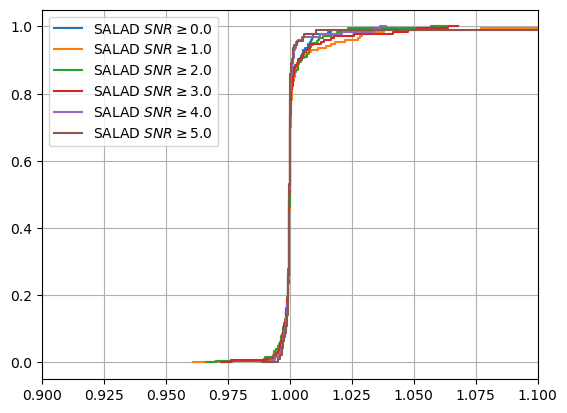

In [466]:
ax = plt.subplot()
for g in joined.group_by("snr").groups:
    snr = g[0]['snr']
    ecdf(g['cosine_distance_kbmod']/g['cosine_distance_salad']).cdf.plot(ax, label=r"SALAD $SNR\geq$" + str(snr))

plt.xlim(0.9, 1.1)
plt.legend()
plt.grid()
plt.show()

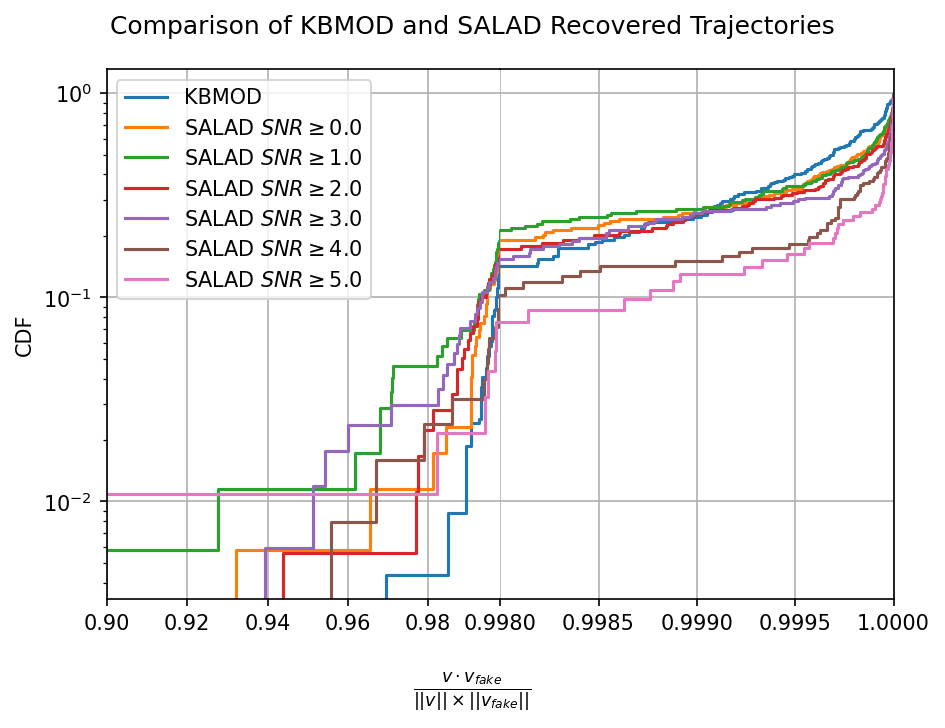

In [524]:
fig = plt.figure(dpi=150, facecolor='white')
axs = fig.subplots(1, 2)
for ax in axs:
    ecdf(joined['cosine_distance_kbmod']).cdf.plot(ax, label="KBMOD")

for g in joined.group_by("snr").groups:
    snr = g[0]['snr']
    for ax in axs:
        ecdf(g['cosine_distance_salad']).cdf.plot(ax, label=r"SALAD $SNR\geq$" + str(snr))
    
plt.sca(axs[0])
plt.yscale("log")
plt.ylabel("CDF")

plt.legend(loc='upper left')
plt.xlim(0.90, 0.99788)
plt.grid()

plt.sca(axs[1])
plt.yscale("log")
plt.xlim(0.998, 1)
plt.grid()

fig.supxlabel(r"$\frac{v \cdot v_{fake}}{\vert\vert v \vert\vert \times \vert\vert v_{fake} \vert\vert}$")
fig.suptitle("Comparison of KBMOD and SALAD Recovered Trajectories")
fig.tight_layout()

# merge plots
axs[0].spines['right'].set_visible(False)
axs[1].spines['left'].set_visible(False)
axs[1].tick_params(left=False, labelleft=False, which='both')
plt.subplots_adjust(wspace=0)

# plt.savefig("figures/kbmod_salad_recovered_trajectories.pdf")
plt.show()

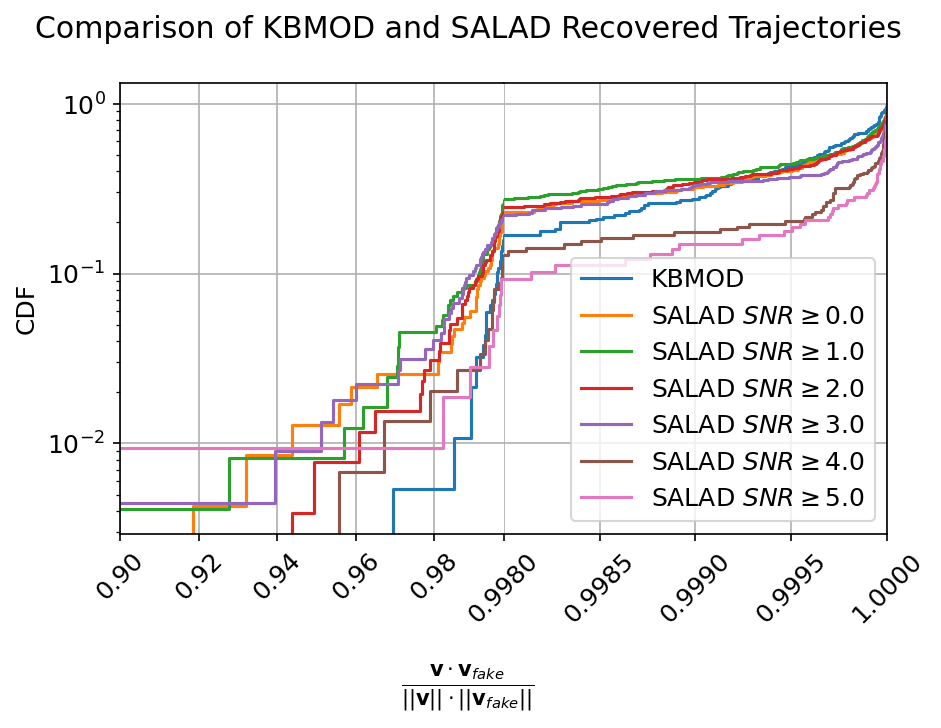

In [686]:
fig = plt.figure(dpi=150, facecolor='white')
axs = fig.subplots(1, 2)

for ax in axs:
    ecdf(kbmod_fakes['cosine_distance']).cdf.plot(ax, label="KBMOD")

for g in salad_fakes.group_by("snr").groups:
    snr = g[0]['snr']
    for ax in axs:
        ecdf(g['cosine_distance']).cdf.plot(ax, label=r"SALAD $SNR\geq$" + str(snr))
    
plt.sca(axs[0])
plt.yscale("log")
plt.ylabel("CDF")
plt.xticks(rotation=45)

plt.xlim(0.90, 0.9977)
plt.grid()

plt.sca(axs[1])
plt.yscale("log")
plt.xlim(0.998, 1)
plt.xticks(rotation=45)
plt.grid()

# plt.sca(axs[2])
# plt.yscale("log")
# plt.xlim(0.9997, 1)
# plt.grid()
plt.legend(loc='lower right')

fig.supxlabel(r"$\frac{\mathbf{v} \cdot \mathbf{v}_{fake}}{\vert\vert \mathbf{v} \vert\vert \cdot \vert\vert \mathbf{v}_{fake} \vert\vert}$")

fig.suptitle("Comparison of KBMOD and SALAD Recovered Trajectories")
fig.tight_layout()

# merge plots
for ax1, ax2 in zip(axs[:-1], axs[1:]):
    ax1.spines['right'].set_visible(False)
    ax2.spines['left'].set_visible(False)
    ax2.tick_params(left=False, labelleft=False, which='both')
    
plt.subplots_adjust(wspace=0)

plt.savefig("figures/kbmod_salad_recovered_trajectories_cdf.pdf")
plt.show()

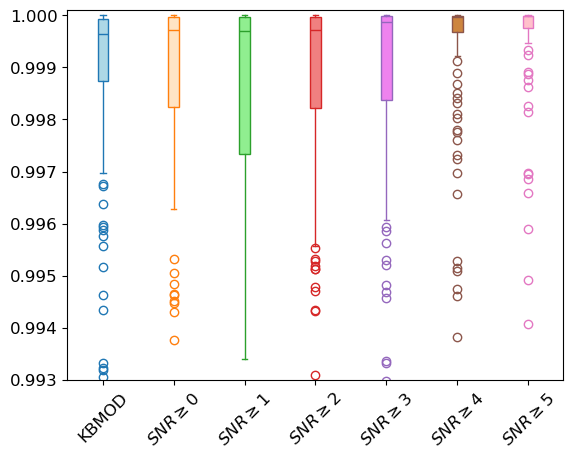

In [707]:
datasets = [
    kbmod_fakes['cosine_distance']
] + list(
    [
        g['cosine_distance']
        for g in salad_fakes.group_by("snr").groups
    ]
)
positions = list(range(7))

for d, p, (c1, c2) in zip(datasets, positions, colors):
    bp = plt.boxplot(
        d,
        positions=[p],
        patch_artist=True,
    )
    for item in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
        plt.setp(bp[item], color=c1)
    plt.setp(bp["boxes"], facecolor=c2)
    plt.setp(bp["fliers"], markeredgecolor=c1)

plt.xticks(range(7), ["KBMOD"] + [rf"$SNR\geq{x}$" for x in range(6)], rotation=45)
plt.ylim(0.993, 1.0001)
plt.show()

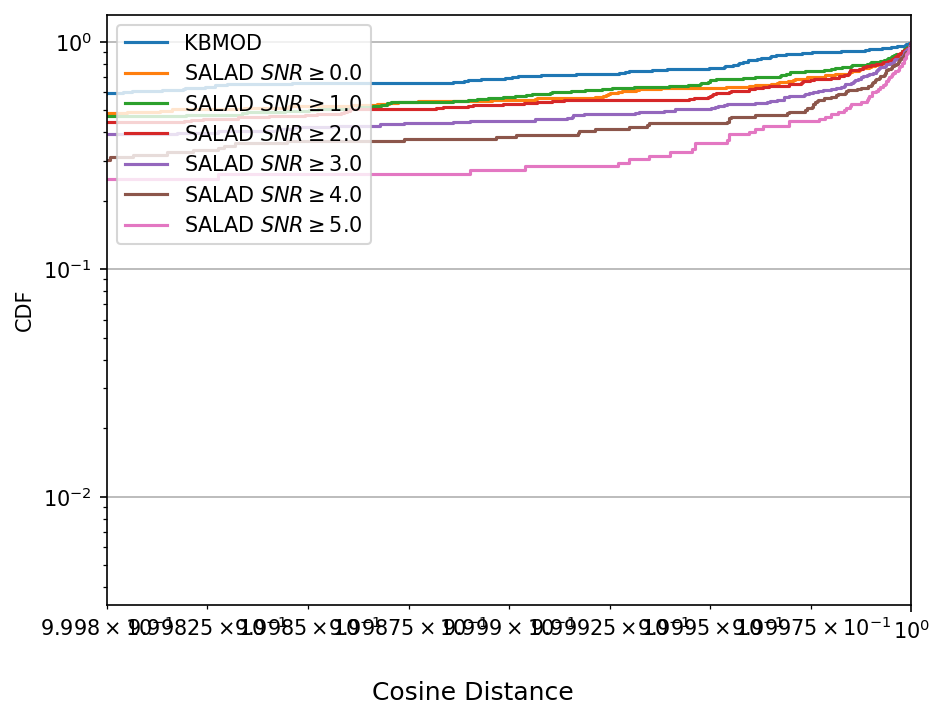

In [502]:
fig = plt.figure(dpi=150, facecolor='white')
axs = np.atleast_1d(fig.subplots(1, 1))
for ax in axs:
    ecdf(joined['cosine_distance_kbmod']).cdf.plot(ax, label="KBMOD")

for g in joined.group_by("snr").groups:
    snr = g[0]['snr']
    for ax in axs:
        ecdf(g['cosine_distance_salad']).cdf.plot(ax, label=r"SALAD $SNR\geq$" + str(snr))
    
plt.sca(axs[0])
plt.yscale("log")
plt.xscale("log")
plt.ylabel("CDF")

plt.legend(loc='upper left')
plt.xlim(0.9998, 1)
plt.grid()

fig.supxlabel("Cosine Distance")

fig.tight_layout()

plt.subplots_adjust(wspace=0)
plt.show()

In [463]:
g = salad_fakes[salad_fakes['ratio_salad'] >= 0.5]
s = g[
    g['cosine_distance'] < 0][
        ['ORBITID', 'snr', 'vra_salad', 'vdec_salad', 'vra', 'vdec', 'x_salad', 'y_salad', 'x', 'y', 'ratio_salad', 'cosine_distance', 'fake']
    ]

s.sort(['cosine_distance'])
s = s[:10]
s.sort("ratio_salad")
s

ORBITID,snr,vra_salad,vdec_salad,vra,vdec,x_salad,y_salad,x,y,ratio_salad,cosine_distance,fake
,,deg / d,deg / d,deg / d,deg / d,pix,pix,pix,pix,,,
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64


In [382]:
salad_results[salad_results['ORBITID'] == 788333]

ORBITID,vra,vdec,v,phi,dt,N,mag,type,binary,ra,dec,expnum,detector,x,y,found_in,ratio,fake,total,found,snr,vra_salad,vdec_salad,ra_salad,dec_salad,x_salad,y_salad
,deg / d,deg / d,deg / d,deg,d,,,,,,,,,,,,,,,,,deg / d,deg / d,deg,deg,pix,pix
int64,float64,float64,float64,float64,float64,int64,float64,str8,bool,float64,float64,int32,int64,float64,float64,int64,float64,int64,int64,bool,float64,float64,float64,float64,float64,float64,float64
788333,-0.012422234345787734,0.005873757956791098,0.013513846447606281,154.69323445979973,0.1783794189686887,104,23.570391285891045,tno,False,-143.3861960756143,-11.553025909160672,845872,16,927.9623093225968,2055.9078712895207,1,1.0,104,104,True,0.0,-0.012402196384145199,0.005486638096404718,216.70015577569018,-11.575021072412142,1226.1138817142162,3212.2016469801247
788333,-0.012422234345787734,0.005873757956791098,0.013513846447606281,154.69323445979973,0.1783794189686887,104,23.570391285891045,tno,False,-143.3861960756143,-11.553025909160672,845872,16,927.9623093225968,2055.9078712895207,1,1.0,104,104,True,1.0,-0.011826452237957958,0.0032374615523502142,216.70006769958547,-11.574812564378021,1223.265299407614,3211.0203952165057
788333,-0.012422234345787734,0.005873757956791098,0.013513846447606281,154.69323445979973,0.1783794189686887,104,23.570391285891045,tno,False,-143.3861960756143,-11.553025909160672,845872,16,927.9623093225968,2055.9078712895207,1,1.0,104,104,True,2.0,-0.01373821714289343,0.004589849170231796,216.70023576448057,-11.574982197470774,1225.5799231299918,3213.272203000216
788333,-0.012422234345787734,0.005873757956791098,0.013513846447606281,154.69323445979973,0.1783794189686887,104,23.570391285891045,tno,False,-143.3861960756143,-11.553025909160672,845872,16,927.9623093225968,2055.9078712895207,1,1.0,104,104,True,3.0,-0.012682452051963996,0.0022523765076397657,216.70013959076925,-11.57475152917155,1222.4285539763443,3211.9823197653777
788333,-0.012422234345787734,0.005873757956791098,0.013513846447606281,154.69323445979973,0.1783794189686887,104,23.570391285891045,tno,False,-143.3861960756143,-11.553025909160672,845872,16,927.9623093225968,2055.9078712895207,29,1.0,104,104,True,4.0,0.028318094625222764,0.014136548581599073,216.69385473090665,-11.576509205845468,1246.6497329144865,3127.855833826303
788333,-0.012422234345787734,0.005873757956791098,0.013513846447606281,154.69323445979973,0.1783794189686887,104,23.570391285891045,tno,False,-143.3861960756143,-11.553025909160672,845872,16,927.9623093225968,2055.9078712895207,66,1.0,104,104,True,5.0,0.025917242475456414,-0.03645127222471432,216.69726927760075,-11.572131375663957,1186.6848813953188,3173.526931462613


In [383]:
fakes_info_with_pos[fakes_info_with_pos['ORBITID'] == 788333]

ORBITID,vra,vdec,v,phi,dt,N,mag,type,binary,ra,dec,expnum,detector,x,y
,deg / d,deg / d,deg / d,deg,d,,,,,,,,,,
int64,float64,float64,float64,float64,float64,int64,float64,str8,bool,float64,float64,int32,int64,float64,float64
788333,-0.012422234345787734,0.005873757956791098,0.013513846447606281,154.69323445979973,0.1783794189686887,104,23.570391285891045,tno,False,-143.3861960756143,-11.553025909160672,845872,16,927.9623093225968,2055.9078712895207


In [ ]:
# what matters more is the likelihood like Pedro has...
# they just move so slowly that you can get it wrong

In [385]:
salad_fake_recoveries[salad_fake_recoveries['ORBITID'] == 788333][['detector', 'snr', 'found_in']]

detector,snr,found_in
int64,float64,int64
16,1.0,1
16,4.0,29
16,3.0,1
16,5.0,66
16,2.0,1
16,0.0,1


In [409]:
f = fakes_lookup[16]
f = f[f['ORBITID'] == 788333]
from astropy.coordinates import SkyCoord

c = SkyCoord(f['RA'] * u.deg, f['DEC'] * u.deg)

In [417]:
fl = fakes_info_lookup[16]
fl = fl[fl['ORBITID'] == 788333]
fl



ORBITID,vra,vdec,v,phi,dt,N,mag,type,binary,ra,dec,expnum,detector
,deg / d,deg / d,deg / d,deg,d,,,,,,,,
int64,float64,float64,float64,float64,float64,int64,float64,str8,bool,float64,float64,int32,int64
788333,-0.012422234345787734,0.005873757956791098,0.013513846447606281,154.69323445979973,0.1783794189686887,104,23.570391285891045,tno,False,-143.3861960756143,-11.553025909160672,845872,16


In [440]:
sr = salad_fake_recoveries[salad_fake_recoveries['ORBITID'] == 788333]
sr.sort("snr")
sr

ORBITID,vra,vdec,v,phi,dt,N,mag,type,binary,ra,dec,expnum,detector,x,y,found_in,ratio,fake,total,found,snr
,deg / d,deg / d,deg / d,deg,d,,,,,,,,,,,,,,,,
int64,float64,float64,float64,float64,float64,int64,float64,str8,bool,float64,float64,int32,int64,float64,float64,int64,float64,int64,int64,bool,float64
788333,-0.012422234345787734,0.005873757956791098,0.013513846447606281,154.69323445979973,0.1783794189686887,104,23.570391285891045,tno,False,-143.3861960756143,-11.553025909160672,845872,16,927.9623093225968,2055.9078712895207,1,1.0,104,104,True,0.0
788333,-0.012422234345787734,0.005873757956791098,0.013513846447606281,154.69323445979973,0.1783794189686887,104,23.570391285891045,tno,False,-143.3861960756143,-11.553025909160672,845872,16,927.9623093225968,2055.9078712895207,1,1.0,104,104,True,1.0
788333,-0.012422234345787734,0.005873757956791098,0.013513846447606281,154.69323445979973,0.1783794189686887,104,23.570391285891045,tno,False,-143.3861960756143,-11.553025909160672,845872,16,927.9623093225968,2055.9078712895207,1,1.0,104,104,True,2.0
788333,-0.012422234345787734,0.005873757956791098,0.013513846447606281,154.69323445979973,0.1783794189686887,104,23.570391285891045,tno,False,-143.3861960756143,-11.553025909160672,845872,16,927.9623093225968,2055.9078712895207,1,1.0,104,104,True,3.0
788333,-0.012422234345787734,0.005873757956791098,0.013513846447606281,154.69323445979973,0.1783794189686887,104,23.570391285891045,tno,False,-143.3861960756143,-11.553025909160672,845872,16,927.9623093225968,2055.9078712895207,29,1.0,104,104,True,4.0
788333,-0.012422234345787734,0.005873757956791098,0.013513846447606281,154.69323445979973,0.1783794189686887,104,23.570391285891045,tno,False,-143.3861960756143,-11.553025909160672,845872,16,927.9623093225968,2055.9078712895207,66,1.0,104,104,True,5.0


In [424]:
sf = salad_fakes[salad_fakes['ORBITID'] == 788333]
sf.sort("snr")
sf[['snr', 'vra', 'vdec', 'vra_salad', 'vdec_salad', 'ratio_salad', 'cosine_distance']]

snr,vra,vdec,vra_salad,vdec_salad,ratio_salad,cosine_distance
,deg / d,deg / d,deg / d,deg / d,,
float64,float64,float64,float64,float64,float64,float64
0.0,-0.012422234345787734,0.005873757956791098,-0.012402196384145199,0.005486638096404718,1.0,0.9996830792494295
1.0,-0.012422234345787734,0.005873757956791098,-0.011826452237957958,0.0032374615523502142,1.0,0.9848160745533121
2.0,-0.012422234345787734,0.005873757956791098,-0.01373821714289343,0.004589849170231796,1.0,0.9928979236006964
3.0,-0.012422234345787734,0.005873757956791098,-0.012682452051963996,0.0022523765076397657,1.0,0.964850832470514
4.0,-0.012422234345787734,0.005873757956791098,0.028318094625222764,0.014136548581599073,1.0,-0.6179229038752952
5.0,-0.012422234345787734,0.005873757956791098,0.025917242475456414,-0.03645127222471432,1.0,-0.872240024507781


In [449]:
row = sr[sr['snr'] == 5.0][0]
cluster = salad_clusters[(row['detector'], row['snr'])][row['found_in']]
cluster.line.beta

<Quantity [[-0.01293473,  0.0059805 ]] deg / d>

In [438]:
sr[['detector', 'snr', 'found_in']]

detector,snr,found_in
int64,float64,int64
16,1.0,1
16,4.0,29
16,3.0,1
16,5.0,66
16,2.0,1
16,0.0,1


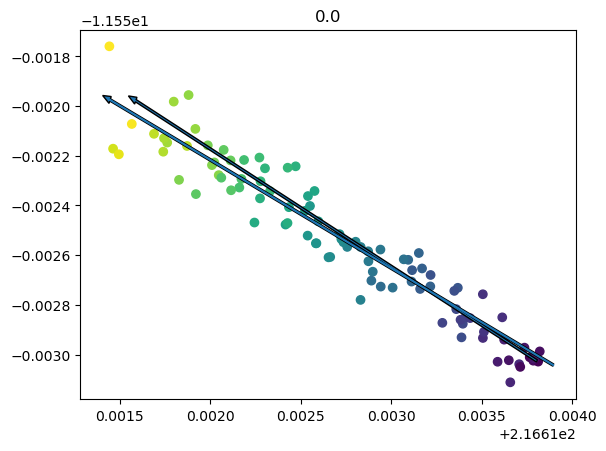

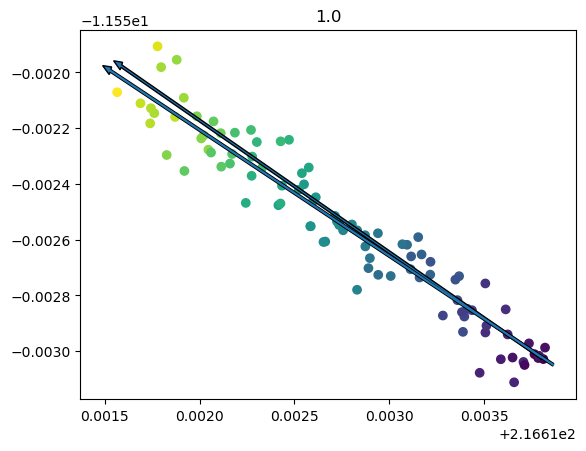

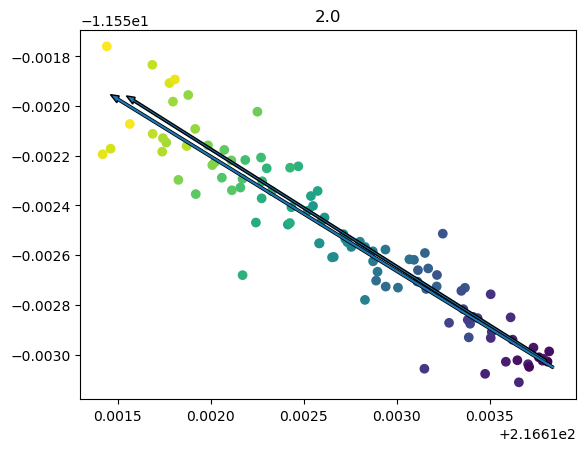

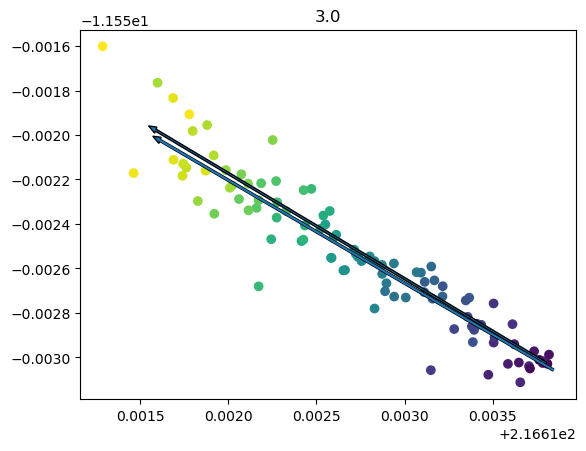

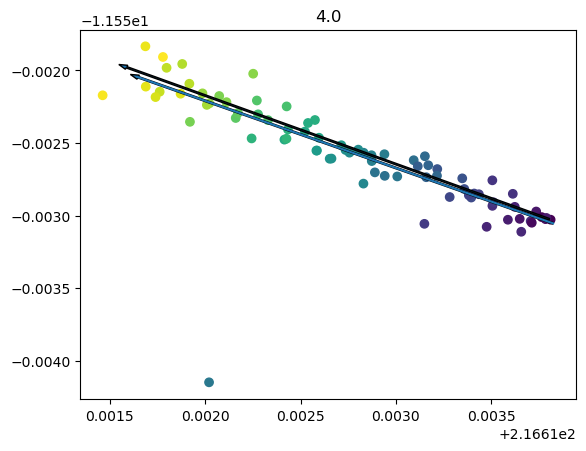

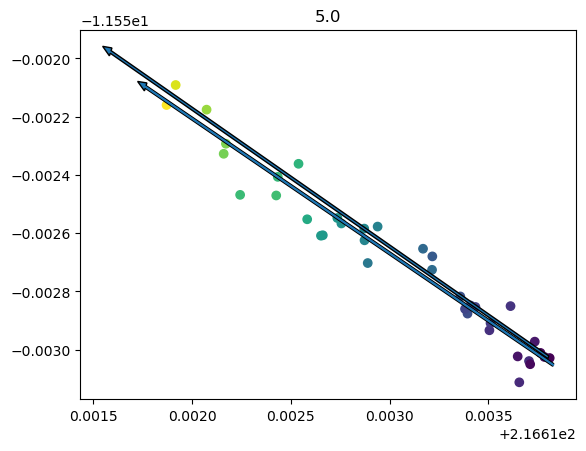

In [447]:
for row in sr[['detector', 'snr', 'found_in']]:
    cluster = salad_clusters[(row['detector'], row['snr'])][row['found_in']]
    plt.scatter(cluster.points[:, 0], cluster.points[:, 1], c=cluster.points[:, 2])
    t = np.linspace(cluster.points[:, 2].min(), cluster.points[:, 2].max(), 100) * u.day
    p = cluster.line.predict(t)
    p = p.value
    plt.plot(p[:, 0], p[:, 1])
    plt.arrow(p[0, 0], p[0, 1], p[-1, 0] - p[0, 0], p[-1, 1] - p[0, 1], width=1e-5)
#     plt.plot(c.ra, c.dec, color='k')
    plt.arrow(
        c.ra[0].value, 
        c.dec[0].value, 
        c.ra[-1].value - c.ra[0].value, 
        c.dec[-1].value - c.dec[0].value, 
        width=1e-5
    )
    plt.title(row['snr'])
    plt.show()
# len(cluster.points)

In [388]:
clusters[(5.0, 16)][66]

KeyError: (5.0, 16)

In [378]:
salad_fake_recoveries[salad_fake_recoveries['ORBITID'] == 5956563]

ORBITID,vra,vdec,v,phi,dt,N,mag,type,binary,ra,dec,expnum,detector,x,y,found_in,ratio,fake,total,found,snr
,deg / d,deg / d,deg / d,deg,d,,,,,,,,,,,,,,,,
int64,float64,float64,float64,float64,float64,int64,float64,str8,bool,float64,float64,int32,int64,float64,float64,int64,float64,int64,int64,bool,float64
5956563,-0.02647207803013483,0.010486149229269383,0.027895296961651283,158.39043552441123,0.1783794189686887,104,24.20455038175394,tno,False,-142.8493509578616,-12.453308562331365,845872,50,1981.8050328262718,755.9264457455804,0,1.0,104,104,True,0.0
5956563,-0.02647207803013483,0.010486149229269383,0.027895296961651283,158.39043552441123,0.1783794189686887,104,24.20455038175394,tno,False,-142.8493509578616,-12.453308562331365,845872,50,1981.8050328262718,755.9264457455804,1,1.0,104,104,True,1.0
5956563,-0.02647207803013483,0.010486149229269383,0.027895296961651283,158.39043552441123,0.1783794189686887,104,24.20455038175394,tno,False,-142.8493509578616,-12.453308562331365,845872,50,1981.8050328262718,755.9264457455804,1,1.0,104,104,True,2.0
5956563,-0.02647207803013483,0.010486149229269383,0.027895296961651283,158.39043552441123,0.1783794189686887,104,24.20455038175394,tno,False,-142.8493509578616,-12.453308562331365,845872,50,1981.8050328262718,755.9264457455804,79,1.0,104,104,True,4.0
5956563,-0.02647207803013483,0.010486149229269383,0.027895296961651283,158.39043552441123,0.1783794189686887,104,24.20455038175394,tno,False,-142.8493509578616,-12.453308562331365,845872,50,1981.8050328262718,755.9264457455804,46,1.0,104,104,True,3.0
5956563,-0.02647207803013483,0.010486149229269383,0.027895296961651283,158.39043552441123,0.1783794189686887,104,24.20455038175394,tno,False,-142.8493509578616,-12.453308562331365,845872,50,1981.8050328262718,755.9264457455804,258,1.0,104,104,True,5.0


In [ ]:
# there are a large number of salad results that have in accurate

In [562]:
bins

[20, 21, 22, 23, 24, 25]

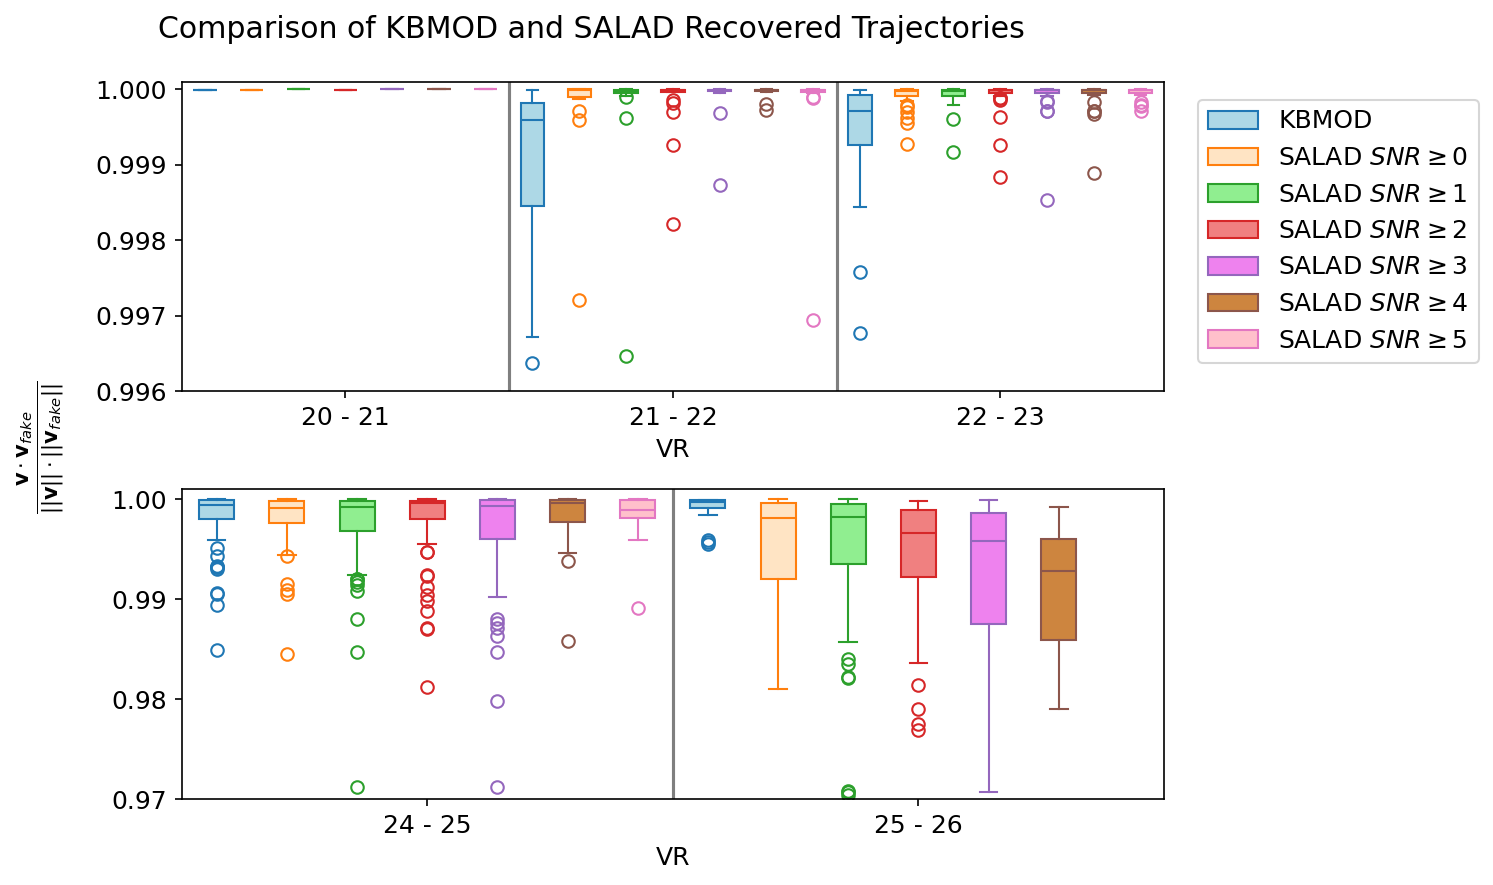

In [678]:
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
# plot the distribution of distance between salad and kbmod as a function of SNR of the object

# g = salad_fakes[(salad_fakes['snr'] == 1.0) & (salad_fakes['ratio_salad'] >= 0.5)]
# result = binned_statistic(g['mag'], g['cosine_distance'], bins=bins)
# x = result.bin_edges[:-1]
# y_kbmod = result.statistic
# result = binned_statistic(g['mag'], g['cosine_distance'], bins=bins, statistic='std')
# yerr_kbmod = result.statistic
# plt.errorbar(x, y, yerr=yerr, fmt='o')

plt.rcParams.update({'font.size': 12})

fig = plt.figure(dpi=150, figsize=(8, 6), facecolor='white')
axs = fig.subplots(2, 1)

colors = [
    ("C0", "lightblue"),
    ("C1", "bisque"),
    ("C2", "lightgreen"),
    ("C3", "lightcoral"),
    ("C4", "violet"),
    ("C5", "peru"),
    ("C6", "pink"),
]

snr = 1.0

def do_plot(t, x, bins, c=None, c_a=None):
    datasets = [t[(t['mag'] >= b) & (t['mag'] < b + dx)]['cosine_distance'] for b in bins]
#     datasets = list(filter(lambda x : len(x[0]) > 0, zip(datasets, bins, x)))
    datasets = list(zip(datasets, bins, x))
    x = list(map(lambda x : x[2], datasets))
    bins = list(map(lambda x : x[1], datasets))
    datasets = list(map(lambda x : x[0], datasets))
    
    bp = plt.boxplot(
        datasets, 
        positions=x, 
        patch_artist=True,
        notch=False
    )
    if c:
        for item in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
            plt.setp(bp[item], color=c)
    if c_a:
        plt.setp(bp["boxes"], facecolor=c_a)
    if c:
        plt.setp(bp["fliers"], markeredgecolor=c)


for ax, bins in zip(axs, [np.arange(20, 24, 1), np.arange(24, 27, 1)]):
    plt.sca(ax)
    snrs = np.arange(0, 6, 1)
    n = (len(snrs) + 1)
    x = np.arange(0, len(bins) * n, 1)
    x_kbmod = x[0:-n:n]

    do_plot(kbmod_fakes, x_kbmod, bins, c=colors[0][0], c_a=colors[0][1])
    for i, snr in enumerate(snrs):
        x_salad = x[i+1:-n:n]
        g = salad_fakes[salad_fakes['snr'] == float(snr)]
        do_plot(g, x_salad, bins, c=colors[i+1][0], c_a=colors[i+1][1])

    for b in x_kbmod[1:]:
        plt.axvline(b - 0.5, color='k', alpha=0.5)

    plt.xticks(x_kbmod - 0.5 + n/2, map(lambda x : f"{x} - {x+1}", bins[:-1]))
    plt.xlabel("VR")
    if bins[0] == 20:
        plt.ylim(0.996, 1.0001)
    else:
        plt.ylim(0.97, 1.001)


plt.sca(axs[0])
fig.legend(
    [
        Patch(facecolor=c[1], edgecolor=c[0])
        for c in colors
    ],
    ["KBMOD"] + [rf"SALAD $SNR\geq{int(snr)}$" for snr in range(0, 6)],
    bbox_to_anchor=(1.25, 0.9),
)

fig.suptitle("Comparison of KBMOD and SALAD Recovered Trajectories")
fig.supylabel(r"$\frac{\mathbf{v} \cdot \mathbf{v}_{fake}}{\vert\vert \mathbf{v} \vert\vert \cdot \vert\vert \mathbf{v}_{fake} \vert\vert}$")

fig.tight_layout()
plt.savefig(
    "figures/kbmod_salad_recovered_trajectories_dist_vs_mag.pdf",
    bbox_inches='tight',
)
plt.show()

In [609]:
x_kbmod

array([ 0,  6, 12, 18, 24, 30])

6 6


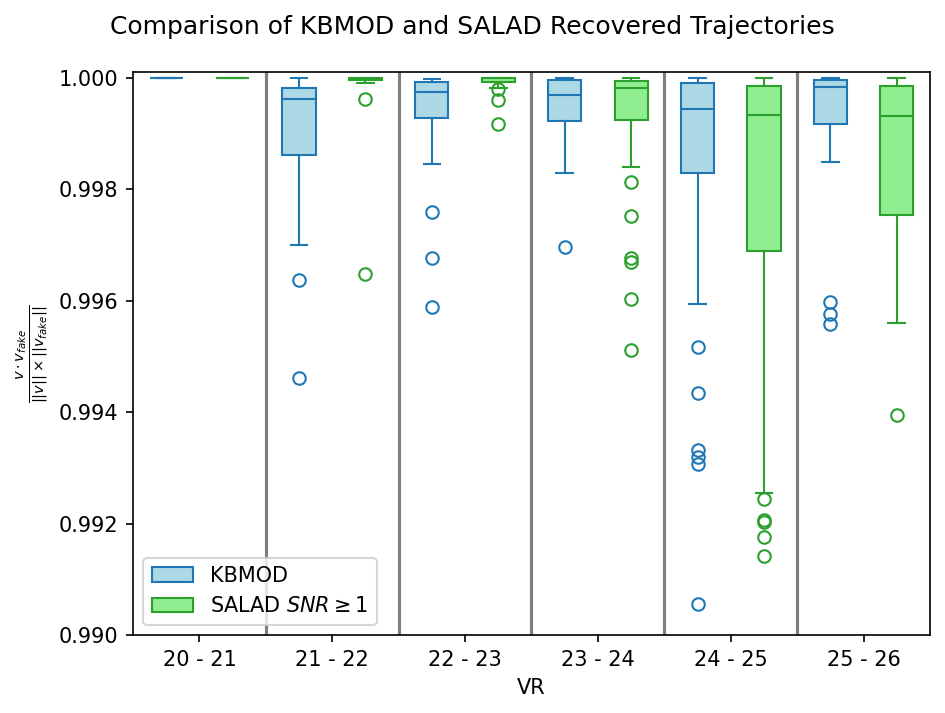

In [599]:
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
# plot the distribution of distance between salad and kbmod as a function of SNR of the object

# g = salad_fakes[(salad_fakes['snr'] == 1.0) & (salad_fakes['ratio_salad'] >= 0.5)]
# result = binned_statistic(g['mag'], g['cosine_distance'], bins=bins)
# x = result.bin_edges[:-1]
# y_kbmod = result.statistic
# result = binned_statistic(g['mag'], g['cosine_distance'], bins=bins, statistic='std')
# yerr_kbmod = result.statistic
# plt.errorbar(x, y, yerr=yerr, fmt='o')

fig = plt.figure(dpi=150, facecolor='white')
axs = fig.subplots()
c1 = "tab:blue"
c1_a = "lightblue"
c2 = "tab:green"
c2_a = "lightgreen"

snr = 1.0

bins = np.arange(20, 27, 1)

g = joined[joined['snr'] == snr]

result = binned_statistic(g['mag'], g['cosine_distance_kbmod'], bins=bins)
x = result.bin_edges[:-1]
y = result.statistic
result = binned_statistic(g['mag'], g['cosine_distance_kbmod'], bins=bins, statistic='std')
yerr = result.statistic
dx = bins[1] - bins[0]
datasets = [g[(g['mag'] >= b) & (g['mag'] < b + dx)]['cosine_distance_kbmod'] for b in bins]
datasets_bins = list(filter(lambda x : len(x[0]) > 0, zip(datasets, bins)))
datasets = list(map(lambda x : x[0], datasets_bins))
bins = list(map(lambda x : x[1], datasets_bins))

print(len(datasets), len(x_kbmod))
# plt.violinplot(datasets, x_kbmod)
bp = plt.boxplot(
    datasets, 
    positions=x_kbmod, 
    patch_artist=True,
    notch=False
)
for item in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
    plt.setp(bp[item], color=c1)
plt.setp(bp["boxes"], facecolor=c1_a)
plt.setp(bp["fliers"], markeredgecolor=c1)


# g = salad_fakes[(salad_fakes['snr'] == snr) & (salad_fakes['ratio_salad'] >= 0.5)]
result = binned_statistic(g['mag'], g['cosine_distance_salad'], bins=bins)
x = result.bin_edges[:-1]
y = result.statistic
result = binned_statistic(g['mag'], g['cosine_distance_salad'], bins=bins, statistic='std')
yerr = result.statistic
dx = bins[1] - bins[0]
datasets = [g[(g['mag'] >= b) & (g['mag'] < b + dx)]['cosine_distance_salad'] for b in bins]
datasets_bins = list(filter(lambda x : len(x[0]) > 0, zip(datasets, bins)))
datasets = list(map(lambda x : x[0], datasets_bins))
bins = list(map(lambda x : x[1], datasets_bins))

bp = plt.boxplot(
    datasets, 
    positions=x_salad, 
    patch_artist=True,
    notch=False
)
for item in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
    plt.setp(bp[item], color=c2)

plt.setp(bp["boxes"], facecolor=c2_a)
plt.setp(bp["fliers"], markeredgecolor=c2)

plt.xticks(x_salad - 0.5, map(lambda x : f"{x} - {x+1}", bins))

for b in x_salad[:-1]:
    plt.axvline(b + 0.5, color='k', alpha=0.5)

plt.ylabel(r"$\frac{v \cdot v_{fake}}{\vert\vert v \vert\vert \times \vert\vert v_{fake} \vert\vert}$")
plt.xlabel("VR")
plt.xlim(0 - 0.5, max(x_salad) + 0.5)
plt.ylim(0.990, 1.0001)

fig.suptitle("Comparison of KBMOD and SALAD Recovered Trajectories")
fig.tight_layout()

plt.legend(
    [
        Patch(facecolor=c1_a, edgecolor=c1), 
        Patch(facecolor=c2_a, edgecolor=c2)
    ],
    ["KBMOD", rf"SALAD $SNR\geq{int(snr)}$"]
)

plt.savefig("figures/kbmod_salad_recovered_trajectories_dist_vs_mag.pdf")
plt.show()

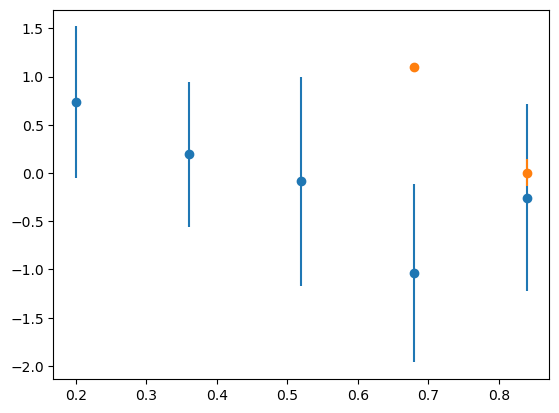

In [357]:
bins = np.linspace(0.2, 1, 6)
g = salad_fakes.group_by(['snr']).groups[1]

result = binned_statistic(g['ratio_salad'], (g['vra_salad'] - g['vra']).to(u.arcsec/u.hour), bins=bins)
x, y = result.bin_edges[:-1], result.statistic
result = binned_statistic(g['ratio_salad'], (g['vra_salad'] - g['vra']).to(u.arcsec/u.hour), bins=bins, statistic='std')
yerr = result.statistic
plt.errorbar(x, y, yerr=yerr, fmt='o')

g = kbmod_fakes
result = binned_statistic(g['ratio_kbmod'], (g['vra_kbmod'] - g['vra']).to(u.arcsec/u.hour), bins=bins)
x, y = result.bin_edges[:-1], result.statistic
result = binned_statistic(g['ratio_kbmod'], (g['vra_kbmod'] - g['vra']).to(u.arcsec/u.hour), bins=bins, statistic='std')
yerr = result.statistic
plt.errorbar(x, y, yerr=yerr, fmt='o')

plt.show()

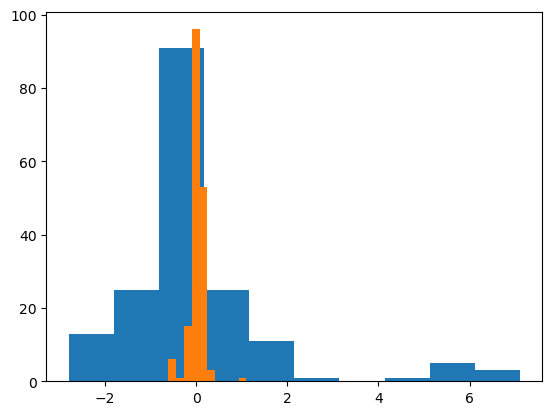

In [150]:
g = joined.group_by(['snr']).groups[0][['vra', 'vra_salad', 'vra_kbmod']]
plt.hist((g['vra_salad'] - g['vra']).to(u.arcsec/u.hour))
plt.hist((g['vra_kbmod'] - g['vra']).to(u.arcsec/u.hour))
# plt.hist(g['vra_salad'] - g['vra_kbmod'])
plt.show()

1.0


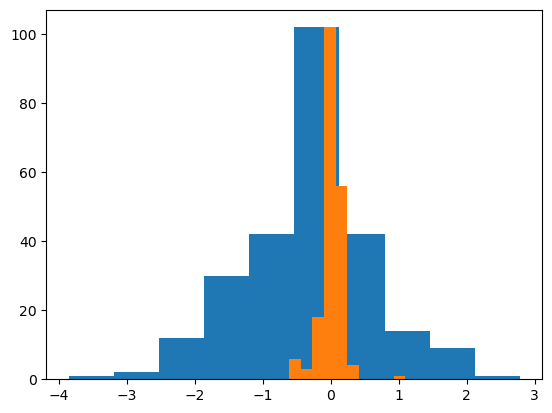

In [73]:
g = salad_fakes.group_by(['snr']).groups[1]
print(g[0]['snr'])
plt.hist((g['vra_salad'] - g['vra']).to(u.arcsec/u.hour))
plt.hist((kbmod_fakes['vra_kbmod'] - kbmod_fakes['vra']).to(u.arcsec/u.hour))
plt.show()

In [63]:
joined['mag'].min()

20.95966889559589

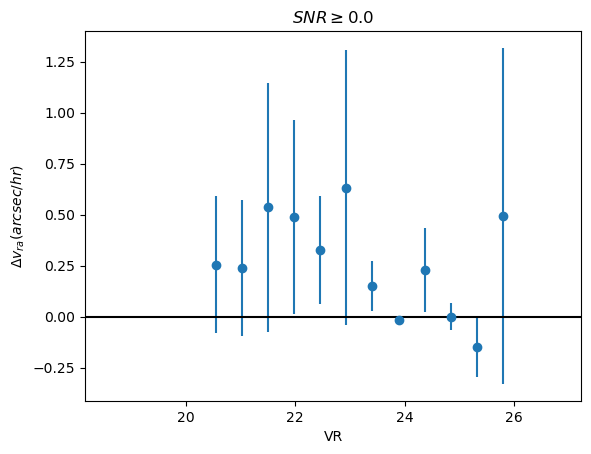

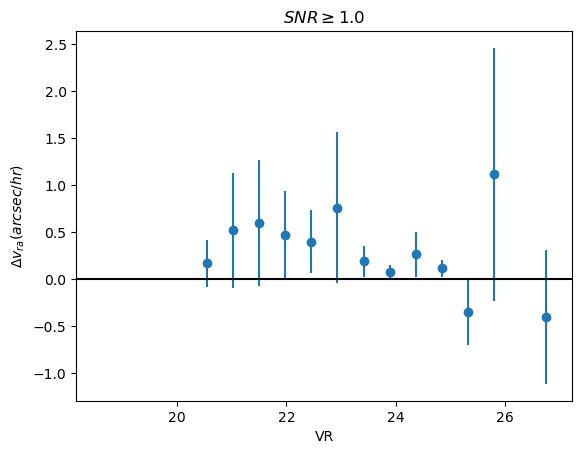

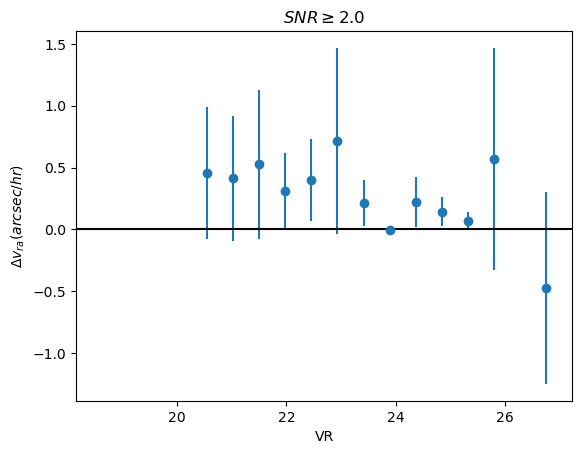

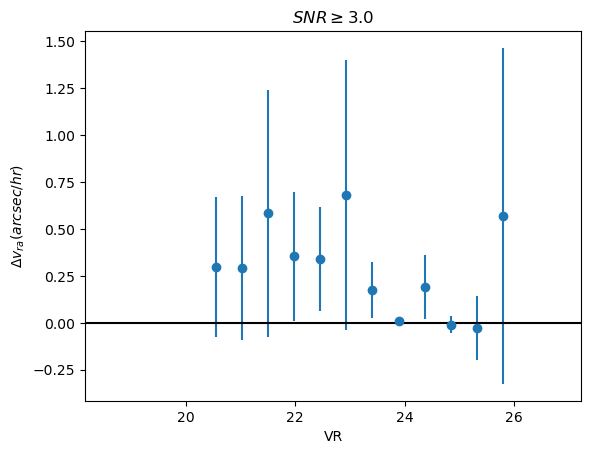

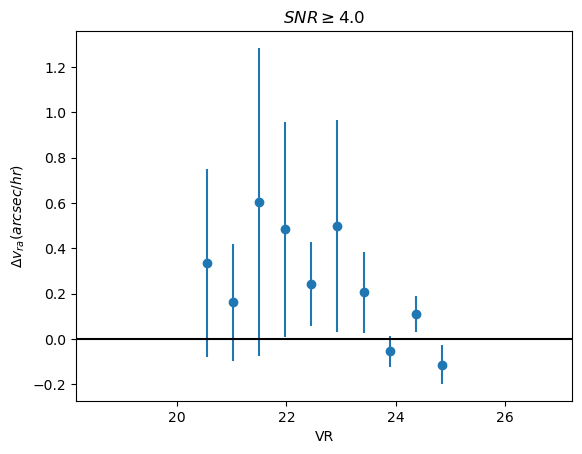

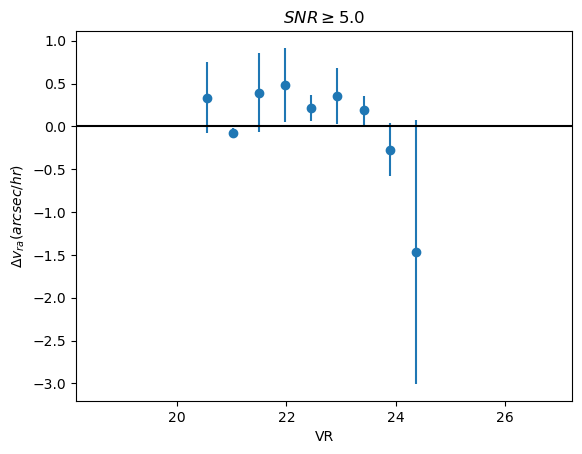

In [65]:
bins = np.linspace(fakes['mag'].min(), fakes['mag'].max(), 20)
for g in salad.group_by(['snr']).groups:
    snr = g[0]['snr']
    joined = astropy.table.join(
        fakes, 
        astropy.table.join(
            g,
            kbmod,
            keys=['ORBITID']
        ),
        keys=['ORBITID']
    )
    vunit = u.arcsec/u.hour
    for c in joined.columns:
        if "vra" in str(c) or "vdec" in str(c):
            joined[c] = joined[c].to(vunit)

    result = binned_statistic(joined['mag'], joined['vra_kbmod'] - joined['vra'], bins=bins)
    x = result.bin_edges[:-1]
    y_kbmod = result.statistic
    result = binned_statistic(joined['mag'], joined['vra_kbmod'] - joined['vra'], bins=bins, statistic='std')
    yerr_kbmod = result.statistic

    result = binned_statistic(joined['mag'], joined['vra_salad'] - joined['vra'], bins=bins)
    x = result.bin_edges[:-1]
    y_salad = result.statistic
    result = binned_statistic(joined['mag'], joined['vra_salad'] - joined['vra'], bins=bins, statistic='std')
    yerr_salad = result.statistic
    
    plt.errorbar(x, y_kbmod - y_salad, yerr=(y_kbmod**2 + y_salad**2)**0.5, fmt='o')
    plt.title("$SNR\geq$" + str(g[0]['snr']))
    plt.xlabel("VR")
    plt.ylabel(r"$\Delta v_{ra} (arcsec/hr)$")
    plt.axhline(0, color='k')
    plt.xlim(bins[0], bins[-1])
    plt.show()

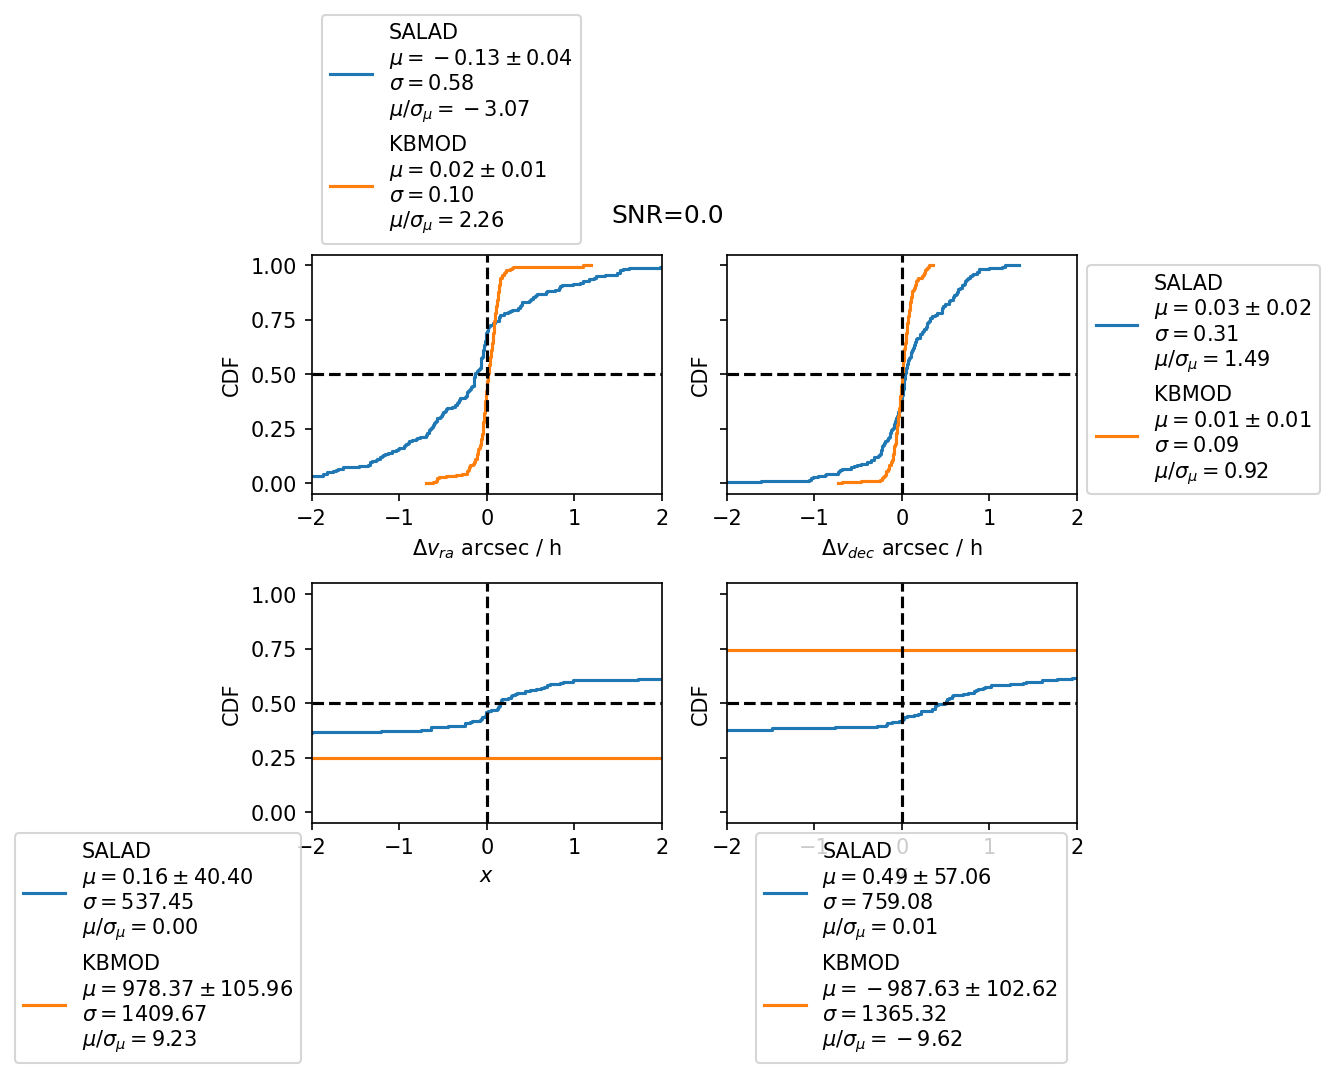

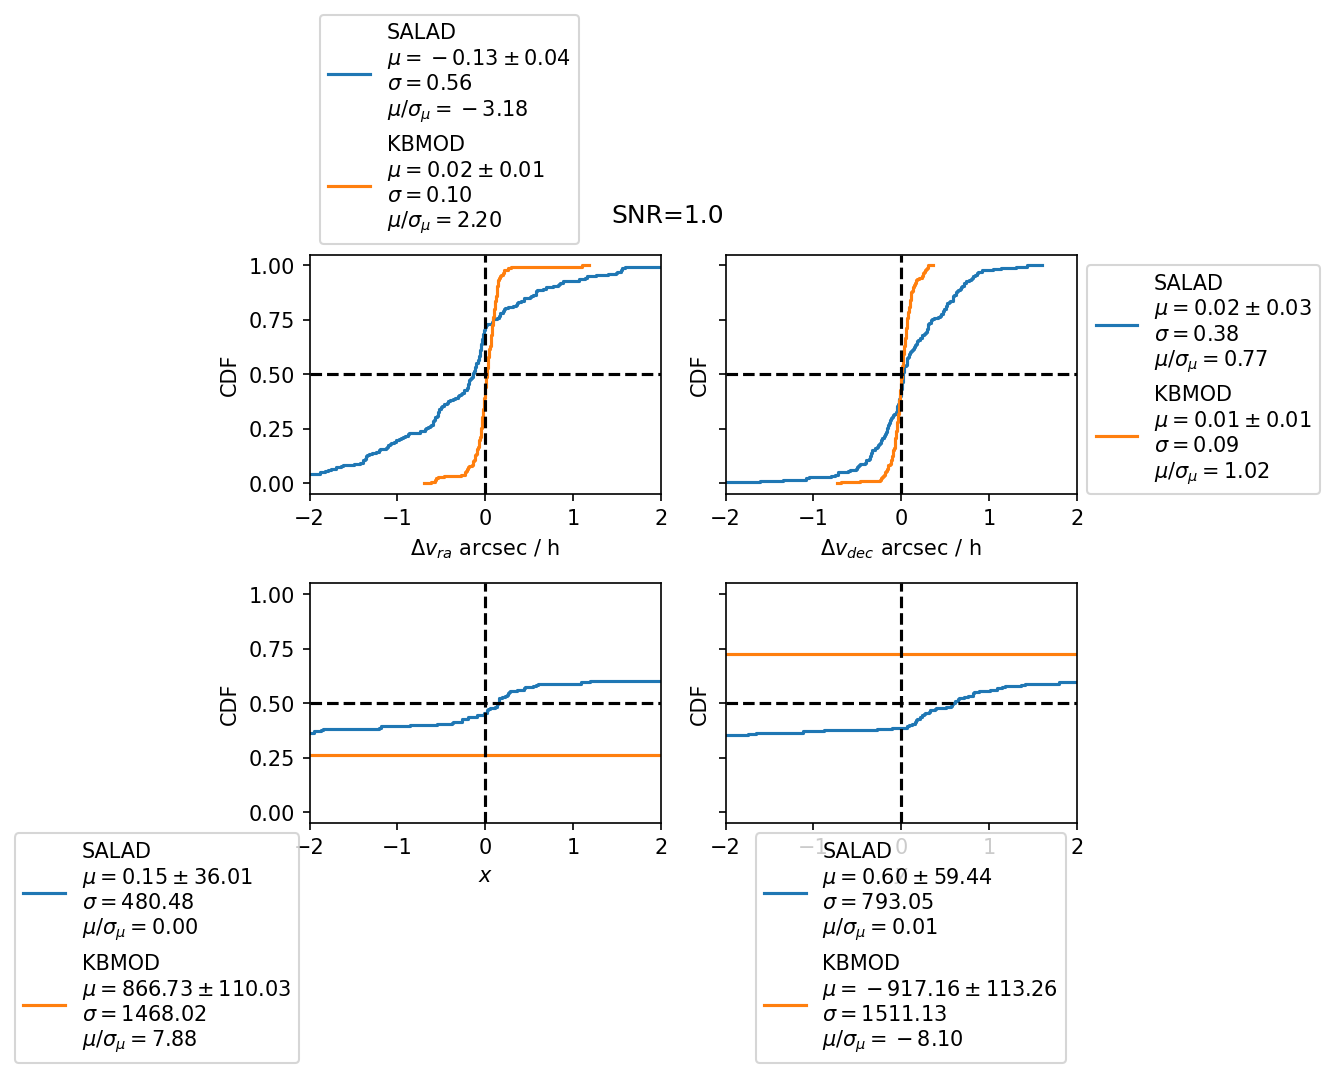

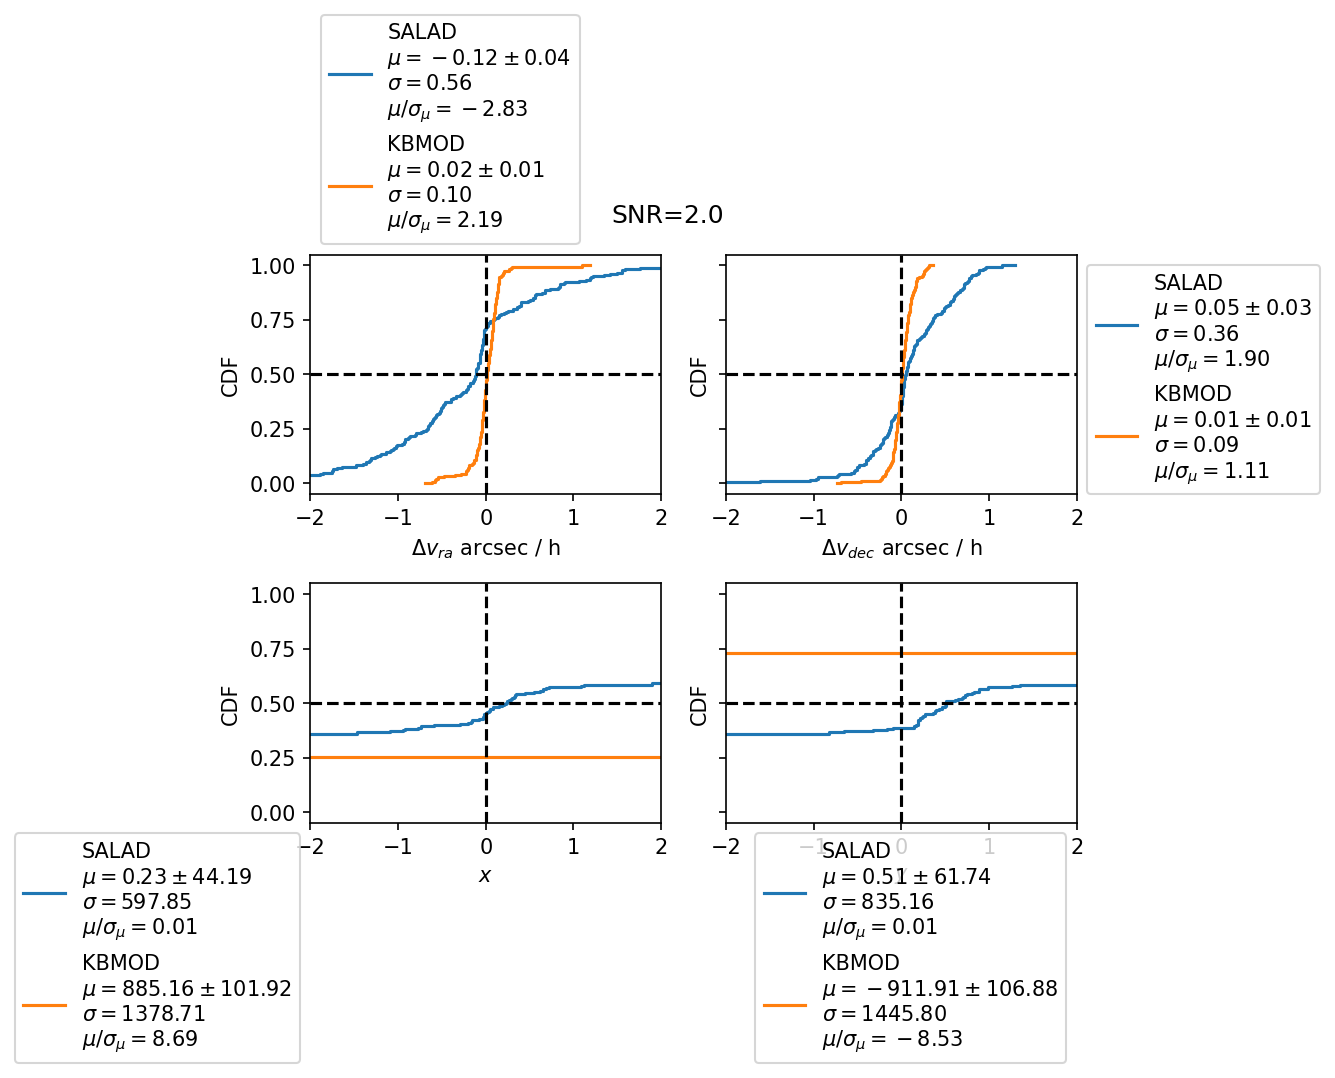

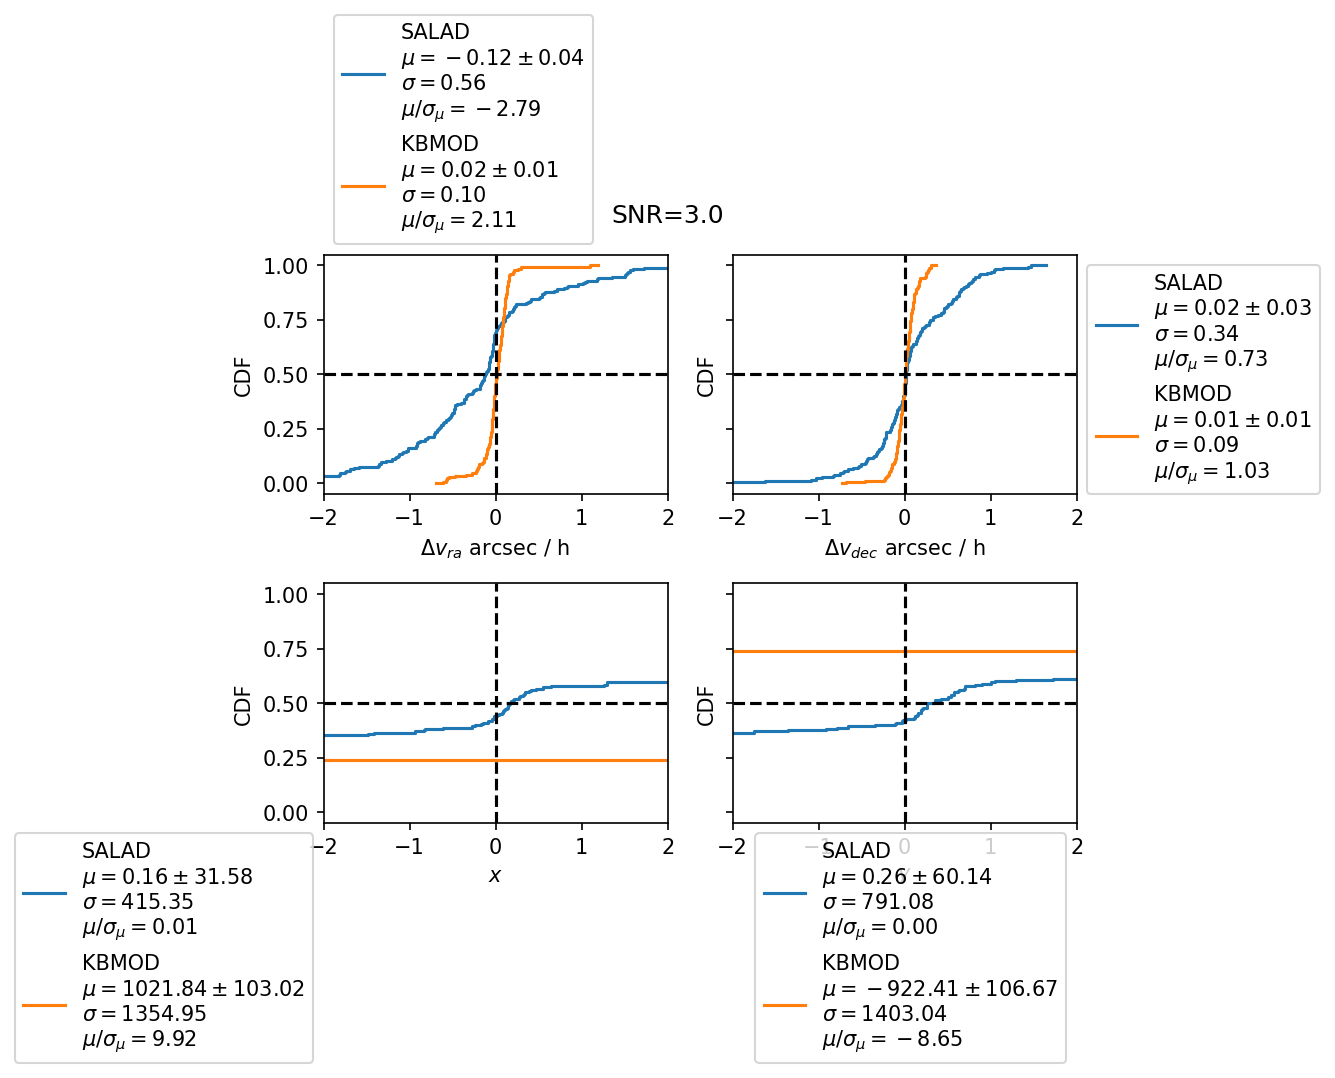

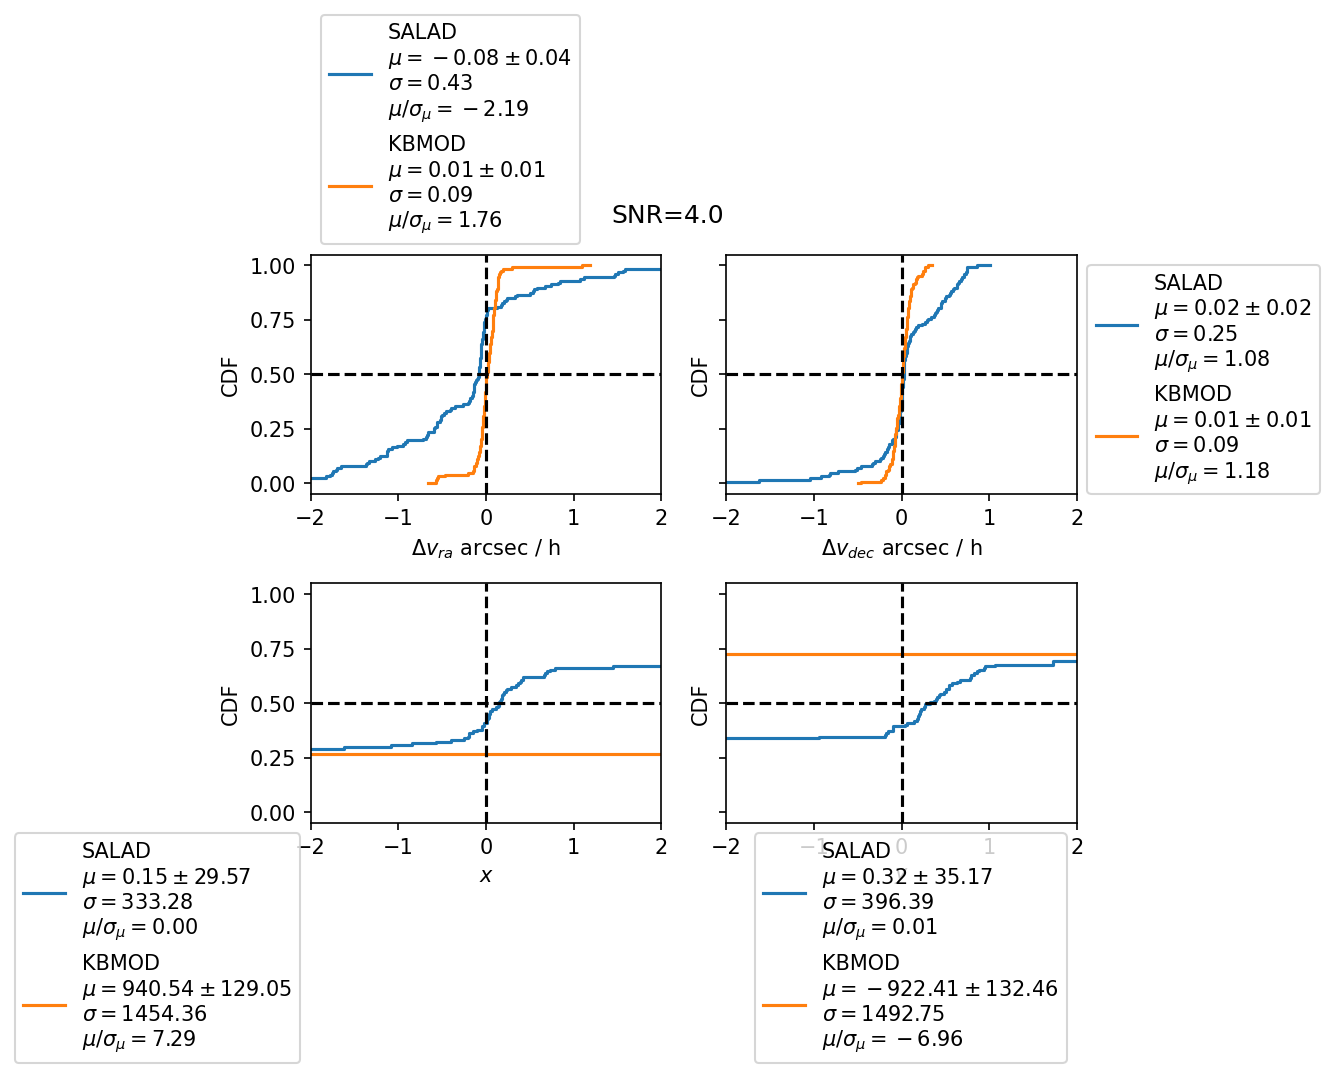

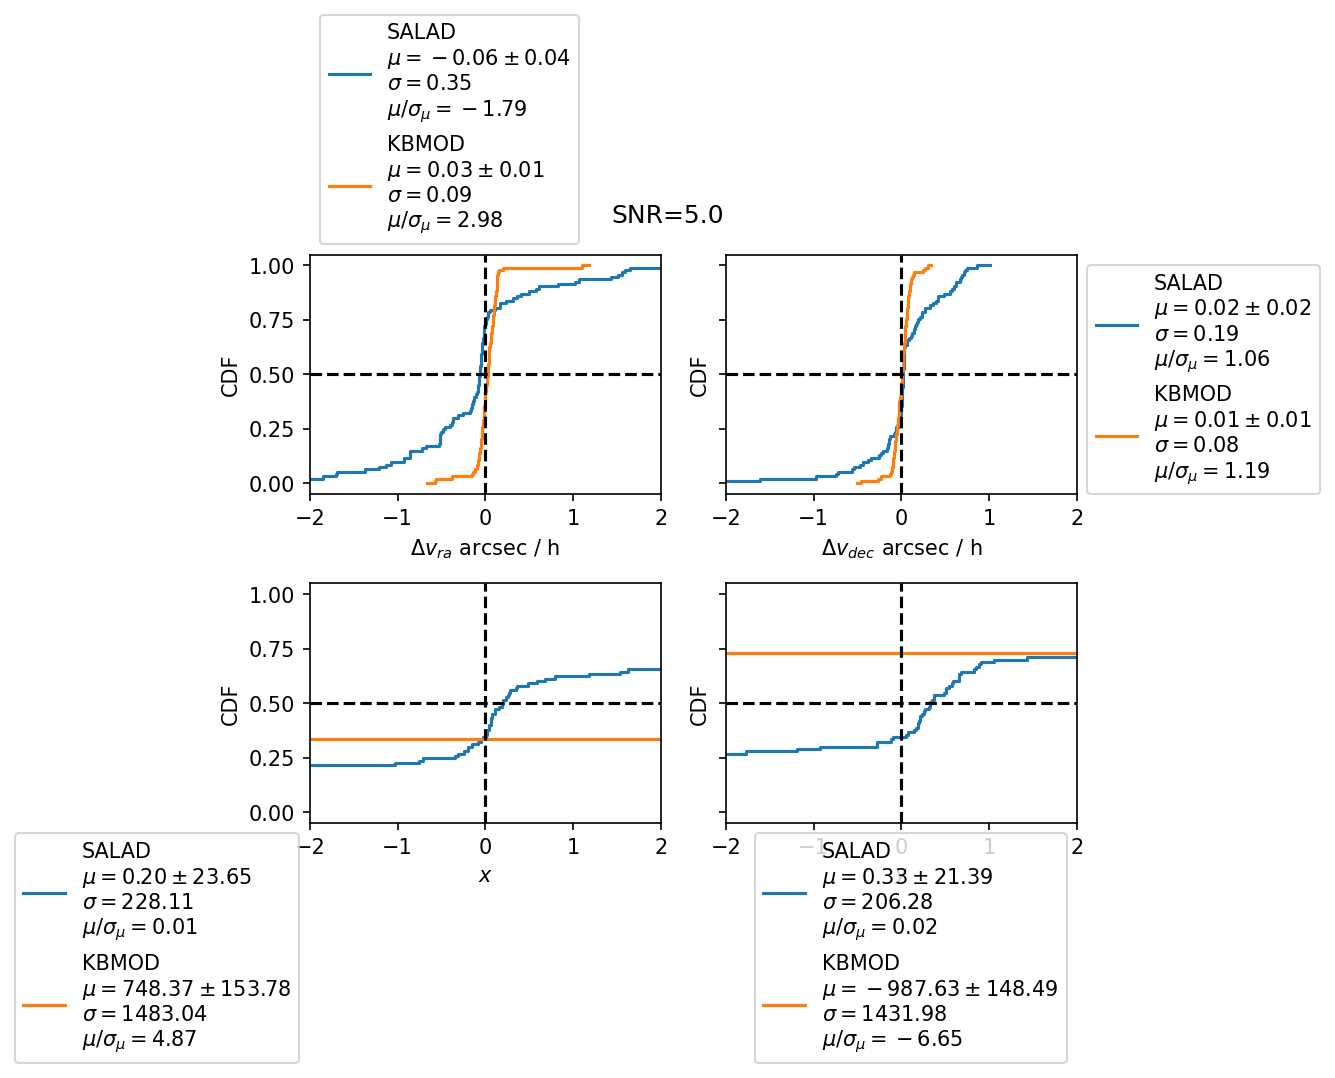

In [27]:
for g in salad.group_by(['snr']).groups:
    snr = g[0]['snr']
    joined = astropy.table.join(
        fakes, 
        astropy.table.join(
            g,
            kbmod,
            keys=['ORBITID']
        ),
        keys=['ORBITID']
    )
    vunit = u.arcsec/u.hour
    for c in joined.columns:
        if "vra" in str(c) or "vdec" in str(c):
            joined[c] = joined[c].to(vunit)
    fig = plt.figure(dpi=150, figsize=(9, 6))
    axs = fig.subplots(2, 2, sharex=False, sharey=True).flatten()
    
    def plot(ax, x, l):
        if hasattr(x, 'value'):
            x = x.value
        n = len(x)
        q = np.quantile(x, [0.25, 0.5, 0.75])
        m = q[1]
        iqr = q[2] - q[0]
        std = iqr / 1.35

        ecdf(x).cdf.plot(ax, label=f"{l}\n" + rf"$\mu={m:0.2f}\pm{std/n**0.5:0.2f}$" + "\n" + rf"$\sigma={std:0.2f}$" + "\n" + rf"$\mu/\sigma_\mu={m/(std/n**0.5):0.2f}$")
        
    plot(axs[0], joined['vra_salad'] - joined['vra'], "SALAD")
    plot(axs[0], joined['vra_kbmod'] - joined['vra'], "KBMOD")
    plot(axs[1], joined['vdec_salad'] - joined['vdec'], "SALAD")
    plot(axs[1], joined['vdec_kbmod'] - joined['vdec'], "KBMOD")
    plot(axs[2], joined['x_salad'] - joined['x'], "SALAD")
    plot(axs[2], joined['x_kbmod'] - joined['x'], "KBMOD")
    plot(axs[3], joined['y_salad'] - joined['y'], "SALAD")
    plot(axs[3], joined['y_kbmod'] - joined['y'], "KBMOD")

    for ax in axs:
        plt.sca(ax)
        plt.axvline(0, color='k', ls='--')
        plt.axhline(0.5, color='k', ls='--')
    
    plt.sca(axs[0])
    plt.xlabel(r"$\Delta v_{ra}$ " + str(vunit))
    plt.ylabel("CDF")
    plt.legend(bbox_to_anchor=(0, 1))
    plt.xlim(-2, 2)
    
    plt.sca(axs[1])
    plt.xlabel(r"$\Delta v_{dec}$ " + str(vunit))
    plt.ylabel("CDF")
    plt.legend(bbox_to_anchor=(1, 1))
    plt.xlim(-2, 2)
    
    plt.sca(axs[2])
    plt.xlabel(r"$x$")
    plt.ylabel("CDF")
    plt.legend(bbox_to_anchor=(0, 0))
    plt.xlim(-2, 2)
    
    plt.sca(axs[3])
    plt.xlabel(r"$y$")
    plt.ylabel("CDF")
    plt.legend(bbox_to_anchor=(1, 0))
    plt.xlim(-2, 2)    
    
    fig.suptitle(f"SNR={snr}")
    plt.tight_layout()
    plt.show()
#     break


In [ ]:
for g in salad.group_by(['snr']).groups:
    snr = g[0]['snr']
    joined = astropy.table.join(
        fakes, 
        astropy.table.join(
            g,
            kbmod,
            keys=['ORBITID']
        ),
        keys=['ORBITID']
    )
    
    vunit = u.arcsec/u.hour
    for c in joined.columns:
        if "vra" in str(c) or "vdec" in str(c):
            joined[c] = joined[c].to(vunit)
        
    fig = plt.figure(dpi=150, figsize=(9, 3))
    axs = fig.subplots(1, 2, sharex=True, sharey=True)
    
    plt.sca(axs[0])
    
    x = joined['vra_salad'] - joined['vra']
    x = x.value
    n = len(x)
    q = np.quantile(x, [0.25, 0.5, 0.75])
    m = q[1]
    iqr = q[2] - q[0]
    std = iqr / 1.35
    
    l = rf"$\mu={m:0.2f}\pm{std/n**0.5:0.2f}$" + "\n" + rf"$\sigma={std:0.2f}$" + "\n" + rf"$\mu/\sigma_\mu={m/(std/n**0.5):0.2f}$"    
    ecdf(x).cdf.plot(axs[0], label="SALAD\n" + l)
    
    x = joined['vra_kbmod'] - joined['vra']
    x = x.value
    n = len(x)
    q = np.quantile(x, [0.25, 0.5, 0.75])
    m = q[1]
    iqr = q[2] - q[0]
    std = iqr / 1.35
    
    l = rf"$\mu={m:0.2f}\pm{std/n**0.5:0.2f}$" + "\n" + rf"$\sigma={std:0.2f}$" + "\n" + rf"$\mu/\sigma_\mu={m/(std/n**0.5):0.2f}$"    
    ecdf(x).cdf.plot(axs[0], label="KBMOD\n" + l)
    
    plt.axvline(0, color='k', ls='--')
    plt.axhline(0.5, color='k', ls='--')
    
    plt.xlabel(r"$\Delta v_{ra}$ " + str(vunit))
    plt.ylabel("CDF")
    plt.legend(bbox_to_anchor=(-0.25, 1))
    
    plt.sca(axs[1])
    x = ((joined['vdec_salad'] - joined['vdec']).to(u.arcsec/u.hour) / (0.263 * u.arcsec / u.pixel)).value
    n = len(x)
    q = np.quantile(x, [0.25, 0.5, 0.75])
    m = q[1]
    iqr = q[2] - q[0]
    std = iqr / 1.35

    l = rf"$\mu={m:0.2f}\pm{std/n**0.5:0.2f}$" + "\n" + rf"$\sigma={std:0.2f}$" + "\n" + rf"$\mu/\sigma_\mu={m/(std/n**0.5):0.2f}$"    
    ecdf(x).cdf.plot(axs[1], label="SALAD\n" + l)

    x = joined['vdec_kbmod'] - joined['vdec']
    x = x.value
    n = len(x)
    q = np.quantile(x, [0.25, 0.5, 0.75])
    m = q[1]
    iqr = q[2] - q[0]
    std = iqr / 1.35
    
    l = rf"$\mu={m:0.2f}\pm{std/n**0.5:0.2f}$" + "\n" + rf"$\sigma={std:0.2f}$" + "\n" + rf"$\mu/\sigma_\mu={m/(std/n**0.5):0.2f}$"
    ecdf(x).cdf.plot(axs[1], label="KBMOD\n" + l)
    
    plt.axvline(0, color='k', ls='--')
    plt.axhline(0.5, color='k', ls='--')
    
    plt.xlabel(r"$\Delta v_{dec}$ " + str(vunit))
    plt.ylabel("CDF")
    plt.legend(bbox_to_anchor=(1, 1))
    
#     plt.xlim(-2, 2)
    fig.suptitle(f"SNR={snr}")
    plt.tight_layout()
    plt.show()
    
    fig = plt.figure(dpi=150, figsize=(9, 3))
    axs = fig.subplots(1, 2, sharex=True, sharey=True)
    
    plt.sca(axs[0])
    
    x = joined['ra_salad'] - joined['ra']
    x = x.value
    n = len(x)
    q = np.quantile(x, [0.25, 0.5, 0.75])
    m = q[1]
    iqr = q[2] - q[0]
    std = iqr / 1.35
    
    l = rf"$\mu={m:0.2f}\pm{std/n**0.5:0.2f}$" + "\n" + rf"$\sigma={std:0.2f}$" + "\n" + rf"$\mu/\sigma_\mu={m/(std/n**0.5):0.2f}$"    
    ecdf(x).cdf.plot(axs[0], label="SALAD\n" + l)
    
#     x = (joined['x_kbmod'] - joined['x']).value
#     n = len(x)
#     q = np.quantile(x, [0.25, 0.5, 0.75])
#     m = q[1]
#     iqr = q[2] - q[0]
#     std = iqr / 1.35
    
#     l = rf"$\mu={m:0.2f}\pm{std/n**0.5:0.2f}$" + "\n" + rf"$\sigma={std:0.2f}$" + "\n" + rf"$\mu/\sigma_\mu={m/(std/n**0.5):0.2f}$"    
#     ecdf(x).cdf.plot(axs[0], label="KBMOD\n" + l)
    
    plt.axvline(0, color='k', ls='--')
    plt.axhline(0.5, color='k', ls='--')
    
    plt.xlabel(r"$\Delta v_{ra}$ " + str(vunit))
    plt.ylabel("CDF")
    plt.legend(bbox_to_anchor=(-0.25, 1))
    
    plt.sca(axs[1])
    
    x = joined['dec_salad'] - joined['dec']
    x = x.value
    n = len(x)
    q = np.quantile(x, [0.25, 0.5, 0.75])
    m = q[1]
    iqr = q[2] - q[0]
    std = iqr / 1.35

    l = rf"$\mu={m:0.2f}\pm{std/n**0.5:0.2f}$" + "\n" + rf"$\sigma={std:0.2f}$" + "\n" + rf"$\mu/\sigma_\mu={m/(std/n**0.5):0.2f}$"    
    ecdf(x).cdf.plot(axs[1], label="SALAD\n" + l)
    
    plt.axvline(0, color='k', ls='--')
    plt.axhline(0.5, color='k', ls='--')
    
    plt.xlabel(r"$\Delta v_{dec}$ " + str(vunit))
    plt.ylabel("CDF")
    plt.legend(bbox_to_anchor=(1, 1))
    
    plt.xlim(-2, 2)
    fig.suptitle(f"SNR={snr}")
    plt.tight_layout()
    plt.show()
    break

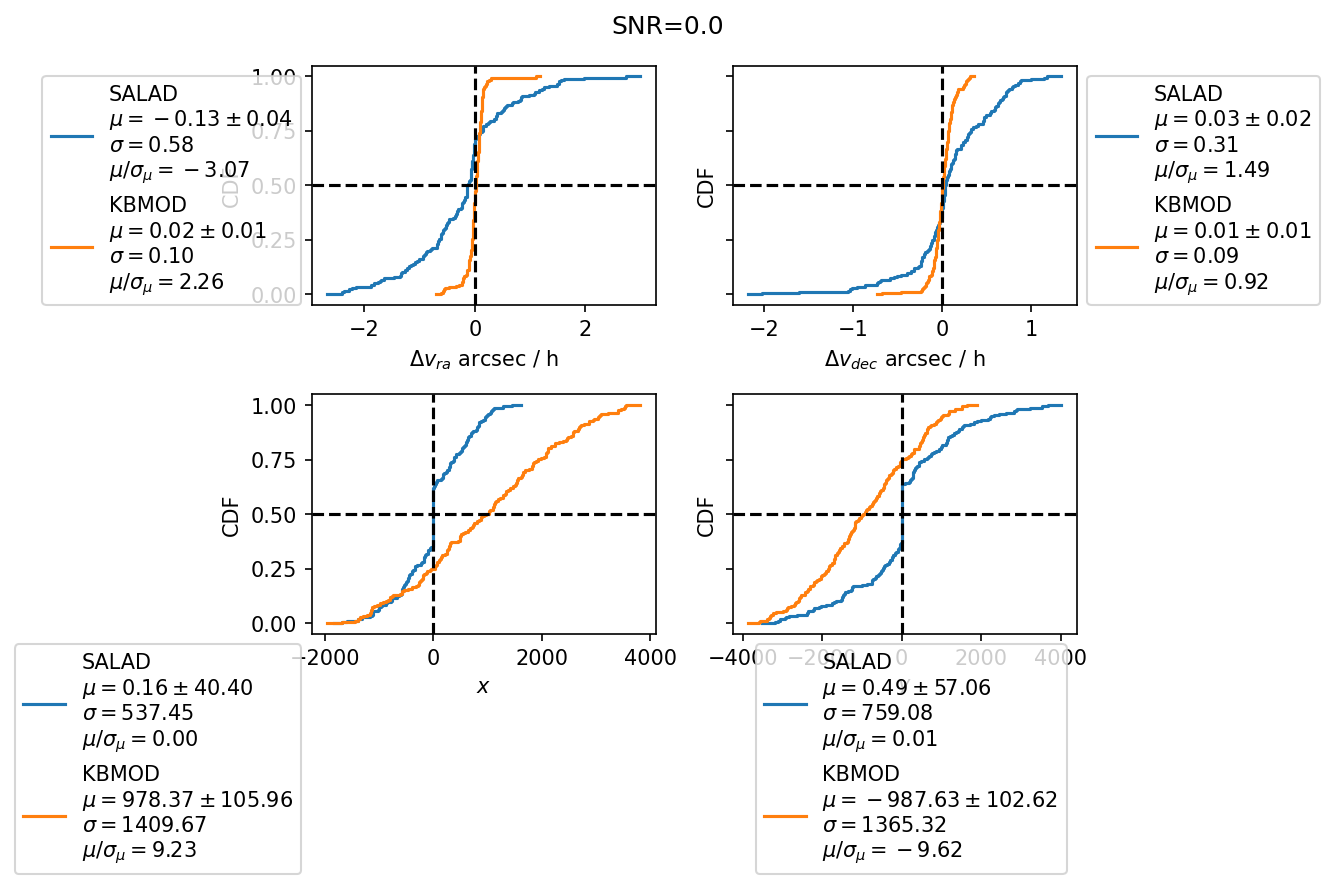

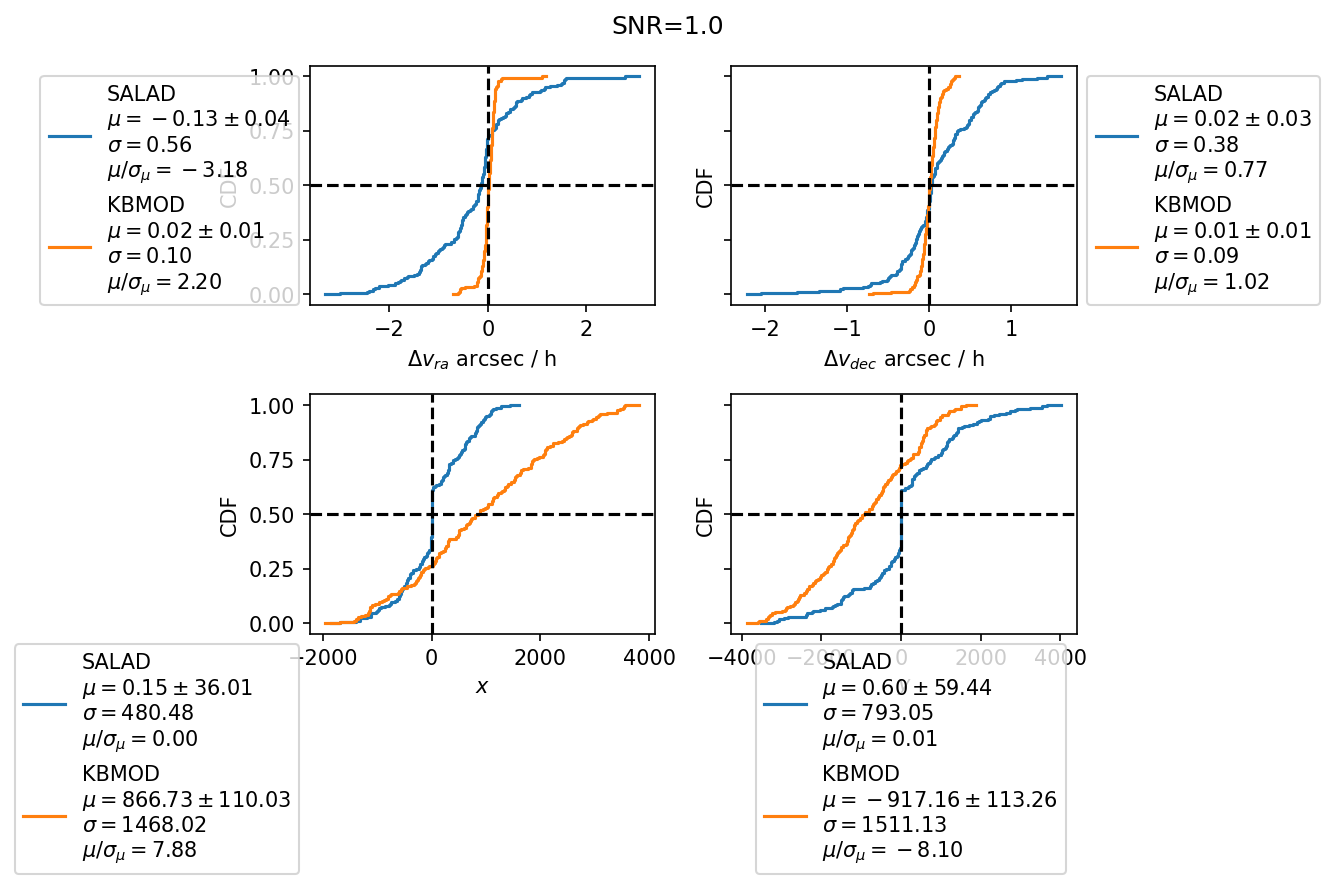

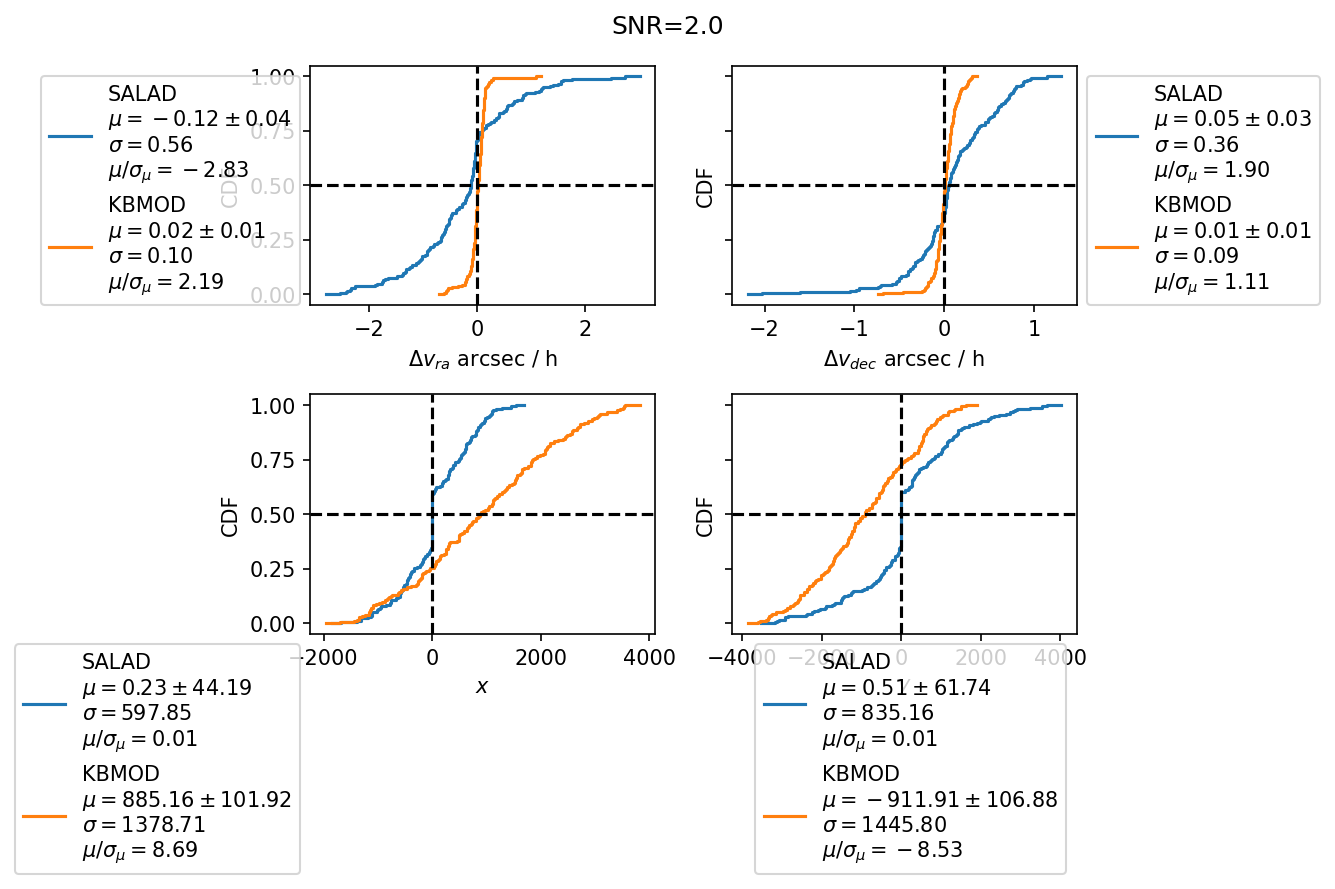

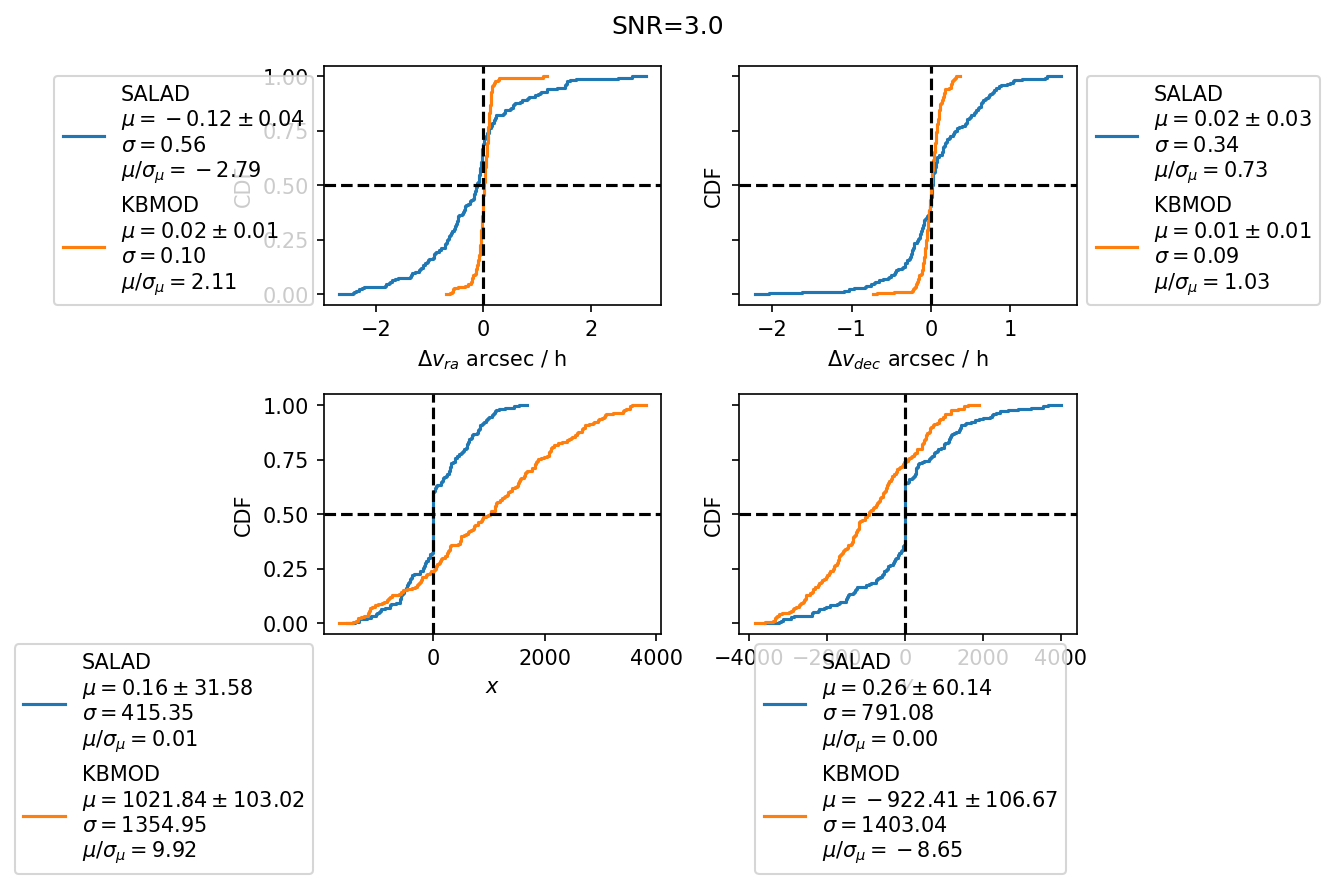

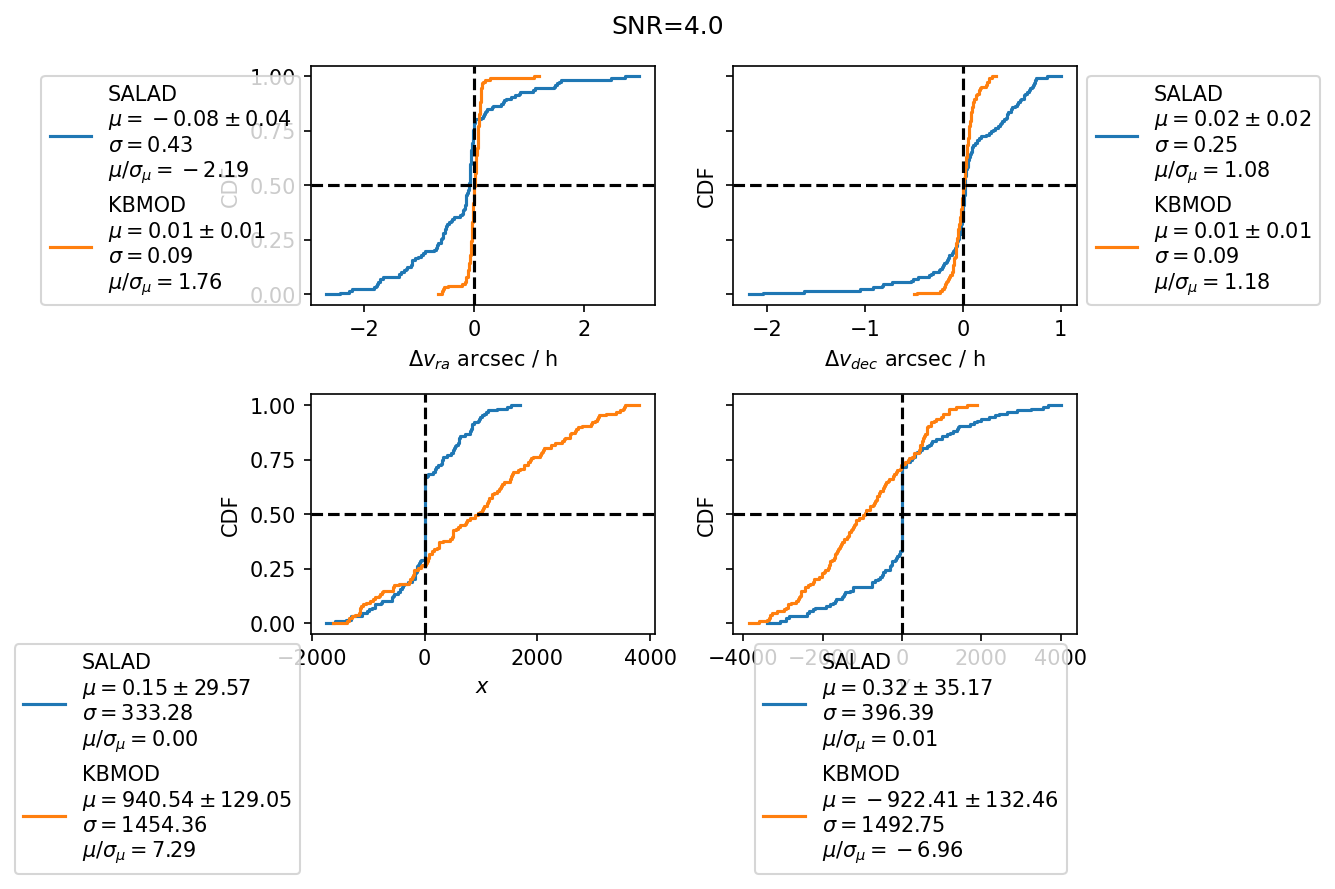

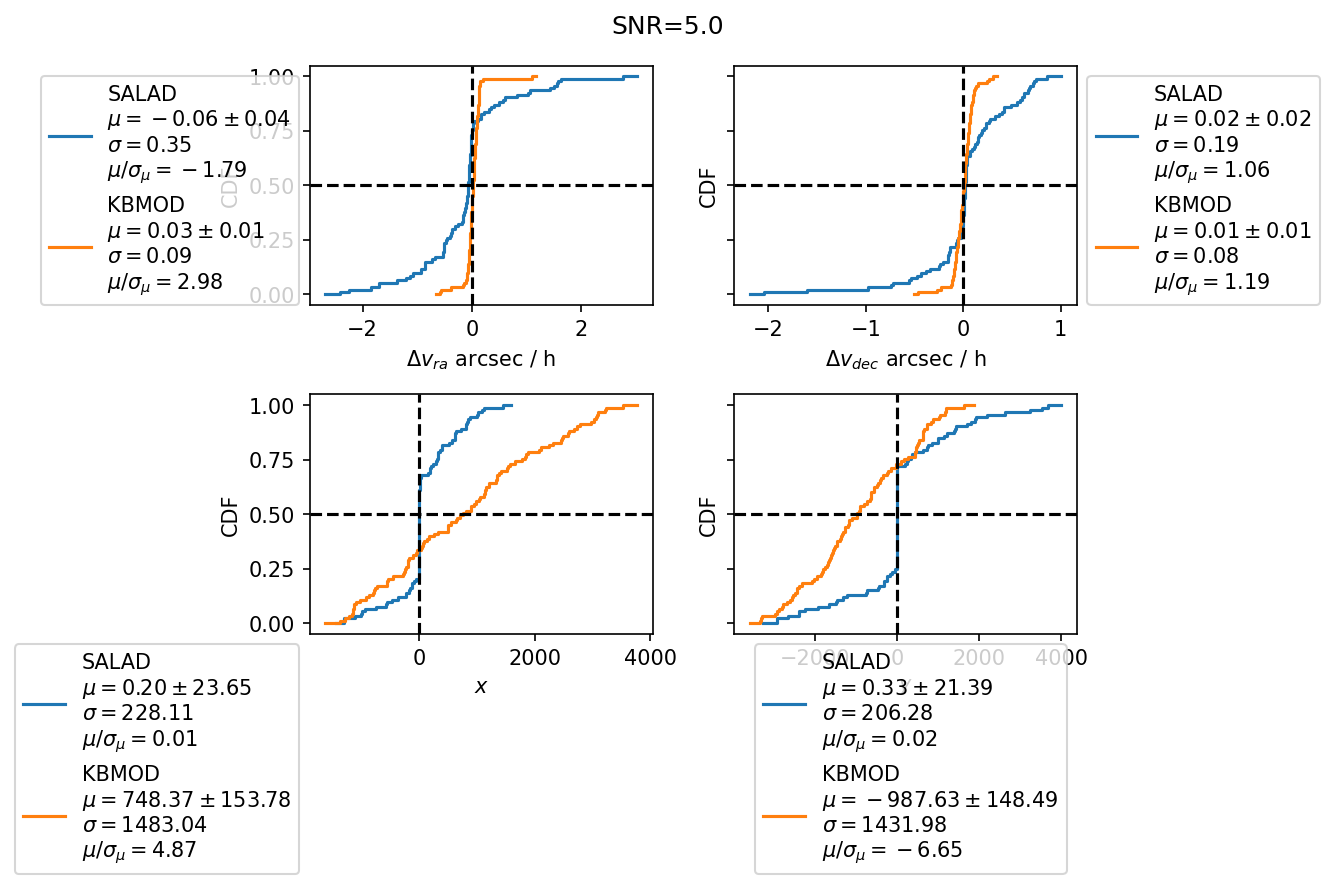

In [451]:
for g in salad.group_by(['snr']).groups:
    snr = g[0]['snr']
    joined = astropy.table.join(
        fakes, 
        astropy.table.join(
            g,
            kbmod,
            keys=['ORBITID']
        ),
        keys=['ORBITID']
    )
    vunit = u.arcsec/u.hour
    for c in joined.columns:
        if "vra" in str(c) or "vdec" in str(c):
            joined[c] = joined[c].to(vunit)
    fig = plt.figure(dpi=150, figsize=(9, 6))
    axs = fig.subplots(2, 2, sharex=False, sharey=True).flatten()
    
    def plot(ax, x, l):
        if hasattr(x, 'value'):
            x = x.value
        n = len(x)
        q = np.quantile(x, [0.25, 0.5, 0.75])
        m = q[1]
        iqr = q[2] - q[0]
        std = iqr / 1.35

        ecdf(x).cdf.plot(ax, label=f"{l}\n" + rf"$\mu={m:0.2f}\pm{std/n**0.5:0.2f}$" + "\n" + rf"$\sigma={std:0.2f}$" + "\n" + rf"$\mu/\sigma_\mu={m/(std/n**0.5):0.2f}$")
        
    plot(axs[0], joined['vra_salad'] - joined['vra'], "SALAD")
    plot(axs[0], joined['vra_kbmod'] - joined['vra'], "KBMOD")
    plot(axs[1], joined['vdec_salad'] - joined['vdec'], "SALAD")
    plot(axs[1], joined['vdec_kbmod'] - joined['vdec'], "KBMOD")
    plot(axs[2], joined['x_salad'] - joined['x'], "SALAD")
    plot(axs[2], joined['x_kbmod'] - joined['x'], "KBMOD")
    plot(axs[3], joined['y_salad'] - joined['y'], "SALAD")
    plot(axs[3], joined['y_kbmod'] - joined['y'], "KBMOD")

    for ax in axs:
        plt.sca(ax)
        plt.axvline(0, color='k', ls='--')
        plt.axhline(0.5, color='k', ls='--')
    
    plt.sca(axs[0])
    plt.xlabel(r"$\Delta v_{ra}$ " + str(vunit))
    plt.ylabel("CDF")
    plt.legend(bbox_to_anchor=(0, 1))
    
    plt.sca(axs[1])
    plt.xlabel(r"$\Delta v_{dec}$ " + str(vunit))
    plt.ylabel("CDF")
    plt.legend(bbox_to_anchor=(1, 1))
    
    plt.sca(axs[2])
    plt.xlabel(r"$x$")
    plt.ylabel("CDF")
    plt.legend(bbox_to_anchor=(0, 0))
    
    plt.sca(axs[3])
    plt.xlabel(r"$y$")
    plt.ylabel("CDF")
    plt.legend(bbox_to_anchor=(1, 0))
    
    fig.suptitle(f"SNR={snr}")
    plt.tight_layout()
    plt.show()
#     break

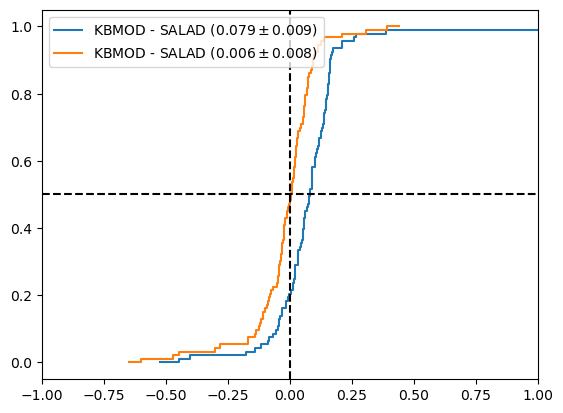

In [219]:
fig = plt.figure()
ax = fig.subplots(1, 1)

x = (joined['vra_kbmod'] - joined['beta_0']).to(u.arcsec/u.hour).value
n = len(x)
q = np.quantile(x, [0.25, 0.5, 0.75])
m = q[1]
iqr = q[2] - q[0]
std = iqr / 1.35

ecdf(x).cdf.plot(ax, label=rf"KBMOD - SALAD (${m:0.3f}\pm{std/n**0.5:0.3f}$)")

x = (joined['vdec_kbmod'] - joined['beta_1']).to(u.arcsec/u.hour).value
n = len(x)
q = np.quantile(x, [0.25, 0.5, 0.75])
m = q[1]
iqr = q[2] - q[0]
std = iqr / 1.35

ecdf(x).cdf.plot(ax, label=rf"KBMOD - SALAD (${m:0.3f}\pm{std/n**0.5:0.3f}$)")
plt.axvline(0, color='k', ls='--')
plt.axhline(0.5, color='k', ls='--')
plt.legend()
plt.xlim(-1, 1)
plt.show()

In [165]:
import astropy.units as u


In [167]:
joined

ORBITID,vra,vdec,mag,detector,snr,found_in,alpha_0,alpha_1,beta_0,beta_1,ratio,x,y,vx,vy,percent_xmatch,vx_fake,vy_fake,vx_salad,vy_salad
,deg / d,deg / d,,,,,deg,deg,deg / d,deg / d,,,,,,,pix / d,pix / d,pix / d,pix / d
int64,float64,float64,float64,int64,float64,int64,float64,float64,float64,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64
14369,-0.01684405047536603,0.007583666323251909,23.75481775599339,23,5.0,75,1273.5917034319873,-459.03355294684445,-0.018040216094603875,0.007636034510396347,1.0,3180,899,234.26820373535156,112.77593994140625,1.0,-230.5649494726909,103.80683940572955,-246.93831916568038,104.52366630200322
19008,-0.012783528515127991,0.004356245159686846,21.827210079744734,51,5.0,19,985.283461177864,-276.4318271792077,-0.013136674842109022,0.004504683826604099,1.0,2610,847,171.7617950439453,53.83203125,1.0,-174.9836602831208,59.62921131130283,-179.8176024014923,61.66107139077854
46206,-0.009884910308630155,0.0023171361260139137,21.097760345908952,60,5.0,69,838.7239697598484,-156.61002811326696,-0.010628642876127336,0.0024529993659859815,1.0,2119,425,143.6689453125,29.501611709594727,1.0,-135.3067570763063,31.71745267547562,-145.48712682151486,33.577177633268185
125150,-0.021494091435165154,0.005418141589351644,21.432044943184277,8,5.0,29,1471.766755529009,-339.73771413935975,-0.021439285662250198,0.005605909687659062,1.0,820,1522,283.925537109375,73.6934814453125,1.0,-294.2157002532112,74.16467574777916,-293.465507163881,76.73488545845103
222968,-0.01904305155307545,0.0046865225124914376,22.608885715035115,9,5.0,22,1345.044677264923,-289.20439235058296,-0.019271682164541268,0.004742324125516662,1.0,1715,806,258.2001647949219,66.6617431640625,1.0,-260.66534445274374,64.15011804170788,-263.7948889442911,64.91394240250943
299736,-0.012942281283029593,0.0036441195883760193,22.61754596123129,21,5.0,114,955.4699833756342,-74.96162173630088,-0.01261810426180511,0.001078406073959911,0.6057692307692307,1495,118,164.74050903320312,25.265419006347656,1.0,-177.15670197302865,49.881484859899885,-172.71929788022203,14.76145196294935
318534,-0.017983152512131704,0.006638254674672812,24.46188293348977,34,5.0,653,1147.4500511186568,-344.81778787661085,-0.01589750387141341,0.005680393095072523,0.9134615384615384,930,731,233.8899383544922,113.5583267211914,1.0,-246.15722069838074,90.86584345559743,-217.6084180117425,77.75443019871135
335766,-0.019054804698747003,0.008315633611391631,22.866739848065208,24,5.0,23,1342.0298464861132,-489.7915269198899,-0.019199406047060087,0.008161771195010006,1.0,236,1428,252.45704650878906,121.10093688964844,1.0,-260.82622401326694,113.82616350193867,-262.8055580586171,111.72006198492784


In [708]:
c = read("/epyc/projects/salad/search/tno_search/DEEP/20190403/A0c/detector_1/snr_5.0/regular/catalog.pkl")

In [720]:
image = read("/epyc/projects/salad/search/tno_search/DEEP/20190403/A0c/detector_1/images.pkl")[0].exposure.image.array



In [736]:
image = read("/epyc/projects/salad/search/tno_search/DEEP/20190403/A0c/detector_1/images.pkl")[0]
image.path

'/epyc/projects/salad/data/DEEP/20190403/A0c/science#step6/20240424T000935Z/differenceExp/20190404/VR/VR_DECam_c0007_6300.0_2600.0/845892/differenceExp_DECam_VR_VR_DECam_c0007_6300_0_2600_0_845892_S29_DEEP_20190403_A0c_scienceHASHstep6_20240424T000935Z.fits'

In [730]:
image = image - image.min()
image.min(), image.max()

(0.0, 42764.914)

/tmp/ipykernel_107434/3521046540.py:1: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(image))


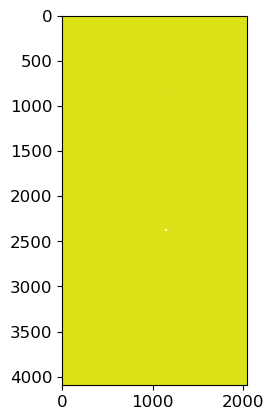

In [732]:
plt.imshow(np.log10(image))
plt.show()

In [714]:
c.single_epoch_catalogs[0].catalog

id,f_x,f_y,i_x,i_y,peakValue,significance,ra,dec
,pix,pix,pix,pix,ct,,rad,rad
int64,float32,float32,int32,int32,float32,float64,float64,float64
1,556.0,93.0,556,93,83.2481,26.315773010253906,3.769762538895247,-0.19255894116025712
2,1544.0,164.0,1544,164,44.54021,15.593432426452637,3.7698480768919467,-0.19381642747003364
3,909.0,173.0,909,173,32.353012,13.753886222839355,3.7698640537742567,-0.19300856080868817
4,1684.0,187.0,1684,187,72.38516,22.894041061401367,3.769876975776203,-0.19399468810943907
5,1454.0,189.0,1454,189,57.714077,39.26181411743164,3.7698811566652344,-0.19370201935994802
6,840.0,282.0,840,282,20.16853,13.899045944213867,3.770006048604556,-0.1929212076215217
7,1386.0,283.0,1386,283,13.311417,5.836478233337402,3.7700036846436706,-0.19361588691497741
8,1041.0,328.0,1041,328,21.60954,9.513195991516113,3.770064439163256,-0.19317715606092553
